# Optimization of Supervised Machine Learning Model for ROP Prediction in Geothermal Wells

## Table of Contents

**1. Data Ingestion** 

1.1: Assignation of mud weights from the drilling mud reports for Well 58-32.

1.2: Assignation of lithologies from the Mud logging report for Well 58-32.

1.3: Assignation of mud weights from the drilling mud reports for Well 21-31.

1.4: Assignation of lithologies from the Mud logging report for Well 21-31.

1.5: Merge Well Data.

**2. Data Preparation**

2.1: Assigning Mohs scale value of different lithologies and Lithology Hardness Type.

2.2: Data Missingness

2.3: Outlier Treatment

    2.3.1: Univariate Analysis
    
    2.3.2: Bivariate Analysis

**3. Exploratory Data Analysis**

3.1: Visualization of Features Distribution

3.2: Visualization of Features Distribution according to Lithology Hardness Type

3.3: Correlation plot (Heatmap) of numerical features

**4. Feature Engineering**

4.1: Feature Creation techniques were employed to transform categorical variables to numerical variables

    4.1.1: One Hot Encoding & Scaling (Standardization)
    
    4.1.2: Mean Encoding
    
    4.1.3: Frequency Encoding
    
4.2: Feature Extraction techniques were employed to extract new features and reduce the dimensionality of large datasets

    4.2.1 Principal Component Analysis (PCA) - numerical variables
    
    4.2.2: Multiple Correspondence Analysis (MCA) - categorical variables
    
**5. Model Development**

5.1: Machine Learning Models

    5.1.1: Baseline Model (Comparison of Feature combinations using Linear Regression)

        5.1.1.1: Linear Regression - One Hot Encoding
    
        5.1.1.2: Linear Regression - Mean Hot Encoding
    
        5.1.1.3: Linear Regression - Frequency Encoding
    
        5.1.1.4: Linear Regression - Principal Component Analysis
    
    5.1.2: Feature Combination Comparison

        5.1.2.1: Feature Combination Comparison of Coffecient of Determination (R2-Score) Metric
    
        5.1.2.2: Feature Combination Comparison of Mean Squared Error (MSE) Metric
    
        5.1.2.3: Feature Combination Comparison of Mean Absolute Error (MAE) Metric
    
        5.1.2.4: Feature Combination Comparison of Mean Absolute Percentage Error (MAPE) Metric
    
    5.1.3: KNN Regression Model

        5.1.3.1: Plot of MSE values to determine optimum K
    
        5.1.3.2: Plot of R2 values to determine optimum K
    
    5.1.4: RandomForest (RF) Model
    
    5.1.5: Support Vector Machine (SVM) Model
    
    5.1.6: Extreme Gradient Boost (XGBoost) Model
    
5.2: Deep Learning Models
    
    5.2.1: Multilayer Perceptron (MLP) Model
    
    5.2.2: Vanilla Neural Network (VNN) Model
    
5.3: Models Comparison using Statistical Metrics

    5.3.1: Comparison of Machine Learning Models and Deep Learning Models based on Training Coefficient of Determination (R2-Score) Metric.
    
    5.3.2: Comparison of Machine Learning Models and Deep Learning Models based on Test Coefficient of Determination (R2-Score) Metric.
    
    5.3.3: Comparison of Machine Learning Models and Deep Learning Models based on Mean Squared Error (MSE) Metric.
    
    5.3.4: Comparison of Machine Learning Models and Deep Learning Models based on Mean Absolute Percentage Error (MAPE) Metric.
    
    5.3.5: Comparison of Machine Learning Models and Deep Learning Models based on Mean Absolute Error (MAE) Metric.
    
    5.3.6: Comparison of Machine Learning Models and Deep Learning Models based on Root Mean Square Error (RMSE) Metric.

**6. Optimization**

    6.1: Hyperparameters Tuning and Cross Validation for KNN Model (GridSearchCV)
    
    6.2: Hyperparameters Tuning and Cross Validation for KNN Model (RandomizedSearchCV)
    
    6.3: Hyperparameters Tuning and Cross Validation for KNN Model (Genetic Algorithm)
    
    6.4: Hyperparameters Tuning and Cross Validation for KNN Model (Hyperband)
    
**7. Evaluation**

    7.1: Comparison of Optimization Algorithm Computation Time.
    
    7.2: Comparison of Optimization Algorithm using R2 Score.

In [1]:
# import some relevant libraries to begin exploratory analysis of the dataset
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import lasio
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None) #to see all available columns

# 1. Data Ingestion

Data was gotten from two geothermal wells: Well 58-32 (Utah) and Fallon Well 21-31 (California) - (https://gdr.openei.org).

### Well 58-32

In [2]:
# Read drilling data into pandas dataframe
rawdata_drill_58_32 = pd.read_csv(
    'C:/Users/sann0002/OneDrive - University of Oklahoma/Documents/Data Analytics/DSA Project/Data/Well_58-32_processed_pason_log.csv')
rawdata_drill_58_32.head()

Depth(ft)  Depth(m)  ROP(1 ft)  ROP(1 m)  weight on bit (k-lbs)  \
0      85.18     25.96      56.80     17.31                    0.0   
1      86.18     26.27      61.14     18.63                    0.0   
2      87.23     26.59      18.58      5.66                    0.0   
3      88.26     26.90      38.29     11.67                    0.0   
4      89.36     27.24     394.38    120.20                    0.0   

   weight on bit (kg)  Temp Out( degF)  Temp Out( degC)  Temp In(degF)  \
0                 0.0            93.49            34.16          90.87   
1                 0.0            93.52            34.18          90.83   
2                 0.0            94.25            34.58          90.91   
3                 0.0            94.44            34.69          91.14   
4                 0.0            94.48            34.71          91.18   

   Temp In(degC)  Pit Total (bbls)  Pit Total (m3)  Pump Press (psi)  \
0          32.71            274.83           43.69            463.72   
1          32.68            274.83           43.69            459.53   
2          32.73            273.80           43.53            454.57   
3          32.86            273.79           43.53            451.14   
4          32.88            273.80           43.53            456.09   

   Pump Press (KPa)  Hookload (k-lbs)  Hookload (kg)  Surface Torque (psi)  \
0           3197.35             31.77       14408.16                  8.93   
1           3168.46             31.01       14063.49                  8.93   
2           3134.26             31.01       14063.49                  9.01   
3           3110.61             31.16       14131.52                  8.97   
4           3144.74             31.54       14303.85                  8.97   

   Surface Torque (KPa)  Rotary Speed (rpm)  Flow In (gal/min)  \
0                 61.57              151.09            1109.58   
1                 61.57              151.09            1108.36   
2                 62.12               61.54            1102.87   
3                 61.85               60.23            1101.04   
4                 61.85               61.75            1102.46   

   Flow In(liters/min)  Flow Out %  WH Pressure (psi)  WH Pressure (KPa)  \
0              4200.22      101.61           -1230.69           -8485.61   
1              4195.60      101.70           -1230.69           -8485.61   
2              4174.82       96.81           -1230.69           -8485.61   
3              4167.89       96.67           -1230.69           -8485.61   
4              4173.26       96.63           -1230.69           -8485.61   

   H2S Floor  H2S Cellar  H2S Pits  
0      -0.01       -0.03      0.31  
1      -0.01       -0.04      0.31  
2      -0.01       -0.03      0.30  
3       0.00       -0.03      0.31  
4      -0.02       -0.02      0.31

In [3]:
rawdata_drill_58_32.columns

Index(['Depth(ft)', 'Depth(m)', 'ROP(1 ft)', 'ROP(1 m)',
       'weight on bit (k-lbs)', 'weight on bit (kg)', 'Temp Out( degF)',
       'Temp Out( degC)', 'Temp In(degF)', 'Temp In(degC)', 'Pit Total (bbls)',
       'Pit Total (m3)', 'Pump Press (psi)', 'Pump Press (KPa)',
       'Hookload (k-lbs)', 'Hookload (kg)', 'Surface Torque (psi)',
       'Surface Torque (KPa)', 'Rotary Speed (rpm)', 'Flow In (gal/min)',
       'Flow In(liters/min)', 'Flow Out %', 'WH Pressure (psi)',
       'WH Pressure (KPa)', 'H2S Floor', 'H2S Cellar', 'H2S Pits'],
      dtype='object')

In [4]:
df_drill_58_32 = rawdata_drill_58_32[['Depth(ft)', 'ROP(1 ft)', 'weight on bit (k-lbs)', 'Pump Press (psi)', 'Surface Torque (psi)',
                                      'Rotary Speed (rpm)', 'Flow In (gal/min)']]
# Rename the features of the new dataframe
df_drill_58_32 = df_drill_58_32.rename(columns={'Depth(ft)': 'DEPTH'})
df_drill_58_32 = df_drill_58_32.rename(columns={'ROP(1 ft)': 'ROP'})
df_drill_58_32 = df_drill_58_32.rename(columns={'Pump Press (psi)': 'Pump_Pressure'})
df_drill_58_32 = df_drill_58_32.rename(columns={'Surface Torque (psi)': 'Torque'})
df_drill_58_32 = df_drill_58_32.rename(columns={'Rotary Speed (rpm)': 'RPM'})
df_drill_58_32 = df_drill_58_32.rename(columns={'Flow In (gal/min)': 'Flow_Rate'})
df_drill_58_32 = df_drill_58_32.rename(columns={'weight on bit (k-lbs)': 'WOB'})
df_drill_58_32.head()

DEPTH     ROP  WOB  Pump_Pressure  Torque     RPM  Flow_Rate
0  85.18   56.80  0.0         463.72    8.93  151.09    1109.58
1  86.18   61.14  0.0         459.53    8.93  151.09    1108.36
2  87.23   18.58  0.0         454.57    9.01   61.54    1102.87
3  88.26   38.29  0.0         451.14    8.97   60.23    1101.04
4  89.36  394.38  0.0         456.09    8.97   61.75    1102.46

### 1.1: Assignation of mud weights from the drilling mud reports.

The mud weights used for drilling the various sections of the well were gotten from the drilling mud reports and assigned as a function of the well depth.

In [5]:
# create a function to assign mud weight used for different depth range
def mud_weight_58_32(DEPTH):
    if (DEPTH < 342):
        return 8.60
    elif (342 < DEPTH <= 3187):
        return 9.20  
    elif (3187 < DEPTH <= 3281):
        return 9.50  
    elif (3281 < DEPTH <= 4044):
        return 9.40 
    elif (4044 < DEPTH <= 4630):
        return 9.0   
    elif (4630 < DEPTH <= 4875):
        return 9.3    
    elif (4875 < DEPTH <= 6177):
        return 9.0  
    elif (6177 < DEPTH <= 7200):
        return 8.40
    elif (7200 < DEPTH <= 7440):
        return 8.50
    elif (7440 < DEPTH <= 7536.25):
        return 8.60
    else:
        return np.nan

In [6]:
# Add the mud weights to the data
df_drill_58_32['MW'] = df_drill_58_32['DEPTH'].apply(mud_weight_58_32)
df_drill_58_32.head()

DEPTH     ROP  WOB  Pump_Pressure  Torque     RPM  Flow_Rate   MW
0  85.18   56.80  0.0         463.72    8.93  151.09    1109.58  8.6
1  86.18   61.14  0.0         459.53    8.93  151.09    1108.36  8.6
2  87.23   18.58  0.0         454.57    9.01   61.54    1102.87  8.6
3  88.26   38.29  0.0         451.14    8.97   60.23    1101.04  8.6
4  89.36  394.38  0.0         456.09    8.97   61.75    1102.46  8.6

### 1.2: Assignation of lithologies from the Mud logging report for Well 58-32.

The lithologies encountered while drilling the wells were gottten from the Mud logging report and assigned as a function of the well depth.

In [7]:
# create a function to assign lithology for corresponding depth range
def lithology_58_32(DEPTH):
    if (DEPTH <= 3176):
        return 'Alluvium'
    elif (3176 < DEPTH <= 3195):
        return 'Rhyolite' 
    elif (3195 < DEPTH <= 7536.25):
        return 'Plutonic' 
    else:
        return np.nan

In [8]:
# Add the lithologies to the data
df_drill_58_32['Lithology'] = df_drill_58_32['DEPTH'].apply(lithology_58_32)
df_drill_58_32.head()

DEPTH     ROP  WOB  Pump_Pressure  Torque     RPM  Flow_Rate   MW Lithology
0  85.18   56.80  0.0         463.72    8.93  151.09    1109.58  8.6  Alluvium
1  86.18   61.14  0.0         459.53    8.93  151.09    1108.36  8.6  Alluvium
2  87.23   18.58  0.0         454.57    9.01   61.54    1102.87  8.6  Alluvium
3  88.26   38.29  0.0         451.14    8.97   60.23    1101.04  8.6  Alluvium
4  89.36  394.38  0.0         456.09    8.97   61.75    1102.46  8.6  Alluvium

In [9]:
df_drill_58_32['Well_ID'] = "58-32"
df_drill_58_32.head()

DEPTH     ROP  WOB  Pump_Pressure  Torque     RPM  Flow_Rate   MW  \
0  85.18   56.80  0.0         463.72    8.93  151.09    1109.58  8.6   
1  86.18   61.14  0.0         459.53    8.93  151.09    1108.36  8.6   
2  87.23   18.58  0.0         454.57    9.01   61.54    1102.87  8.6   
3  88.26   38.29  0.0         451.14    8.97   60.23    1101.04  8.6   
4  89.36  394.38  0.0         456.09    8.97   61.75    1102.46  8.6   

  Lithology Well_ID  
0  Alluvium   58-32  
1  Alluvium   58-32  
2  Alluvium   58-32  
3  Alluvium   58-32  
4  Alluvium   58-32

### Well 21-31

In [10]:
# Define Well log data path in pc
Log_path_21_31 = 'C:/Users/sann0002/OneDrive - University of Oklahoma/Documents/Data Analytics/DSA Project/Data/FORGE 21-31 130_-6058_ LAS.las'
# Reading into a pandas dataframe directly from a .LAS file
rawdata_log_21_31 = lasio.read(Log_path_21_31)
print(rawdata_log_21_31.curves)

Only engine='normal' can read wrapped files


Mnemonic       Unit      Value  Description                                         
--------       ----      -----  -----------                                         
DEPTH          feet             Depth                                               
MUDL_ROP       ft/h             Penetration Rate                                    
MUDL_WOB       1000lbm          Weight On Bit                                       
MUDL_CO2                        CO2                                                 
MUDL_CH4                        CH4                                                 
MUDL_H2S                        H2S                                                 
MUDL_TEMPIN                     Temperature In                                      
MUDL_TEMPOUT                    Temperature Out                                     
MUDL_FRACT     unitless         Fractures (0-100, Subjective)                       
MUDL_MUDLOSS                    Mud Loss                         

In [11]:
# Convert Lasio object into pandas dataframe using df() command
logdataframe_21_31 = rawdata_log_21_31.df()
logdataframe_21_31.head()

MUDL_ROP  MUDL_WOB  MUDL_CO2  MUDL_CH4  MUDL_H2S  MUDL_TEMPIN  \
DEPTH                                                                  
130.0       0.0       1.0       0.0       0.0       0.0          0.0   
131.0     498.0       0.0     206.0       0.0       0.0         55.0   
132.0     675.0       0.0     206.0       0.0       0.0         56.0   
133.0     546.0       1.0     212.0       0.0       0.0         56.0   
134.0     444.0       1.0     212.0       0.0       0.0         56.0   

       MUDL_TEMPOUT  MUDL_FRACT  MUDL_MUDLOSS  MUDL_QUARTZIT  MUDL_CALCITE  \
DEPTH                                                                        
130.0           0.0         0.0           0.0            0.0           0.0   
131.0          55.0         0.0           0.0            0.0           0.0   
132.0          55.0         0.0           0.0            0.0           0.0   
133.0          55.0         0.0           0.0            0.0           0.0   
134.0          55.0         0.0           0.0            0.0           0.0   

       MUDL_PYRITE  MUDL_HEMATITE  MUDL_EPIDOTAL  MUDL_CHLORITE  \
DEPTH                                                             
130.0          0.0            0.0            0.0            0.0   
131.0          0.0            0.0            0.0            0.0   
132.0          0.0            0.0            0.0            0.0   
133.0          0.0            0.0            0.0            0.0   
134.0          0.0            0.0            0.0            0.0   

       MUDL_ANHYDRIT  MUDL_SERICITE  MUDL_PP  MUDL_SPM1  MUDL_SPM2  \
DEPTH                                                                
130.0            0.0            0.0      0.0        0.0        0.0   
131.0            0.0            0.0    661.0       99.0      105.0   
132.0            0.0            0.0    676.0       97.0      105.0   
133.0            0.0            0.0    676.0       97.0      103.0   
134.0            0.0            0.0    676.0       97.0      103.0   

       MUDL_FLOWIN  MUDL_FLOWOUT  MUDL_GAINLOSS  MUDL_RPM  MUDL_TORQUE  \
DEPTH                                                                    
130.0          0.0           0.0            0.0       0.0          0.0   
131.0        668.0          35.0            0.0      57.0          0.0   
132.0        668.0          32.0            0.0      57.0          0.0   
133.0        667.0          33.0            0.0      55.0          0.0   
134.0        667.0          33.0            0.0      54.0          0.0   

       MUDL_PITVOL  MUDL_TUFFASH  MUDL_RHYOLITE  MUDL_BASALT  MUDL_VOLCAN  \
DEPTH                                                                       
130.0          0.0           0.0            0.0          0.0          0.0   
131.0        209.0           0.0            0.0          0.0          0.0   
132.0        204.0           0.0            0.0          0.0          0.0   
133.0        204.0           0.0            0.0          0.0          0.0   
134.0        204.0           0.0            0.0          0.0          0.0   

       MUDL_ANDESITE  MUDL_DACITE  MUDL_TUFFCRYS  MUDL_VOLCSEDI  \
DEPTH                                                             
130.0            0.0          0.0            0.0            0.0   
131.0            0.0          0.0            0.0            0.0   
132.0            0.0          0.0            0.0            0.0   
133.0            0.0          0.0            0.0            0.0   
134.0            0.0          0.0            0.0            0.0   

       MUDL_CHERTARG  MUDL_MARL  MUDL_CLAYST  MUDL_CLAY  MUDL_SILTST  \
DEPTH                                                                  
130.0            0.0        0.0          0.0       40.0          0.0   
131.0            0.0        0.0          0.0       40.0          0.0   
132.0            0.0        0.0          0.0       40.0          0.0   
133.0            0.0        0.0          0.0       40.0          0.0   
134.0            0.0        0.0  

In [12]:
# Changing Depth from index to a feature column
data_drill_21_31 = logdataframe_21_31.rename_axis('DEPTH').reset_index()
data_drill_21_31.head()

DEPTH  MUDL_ROP  MUDL_WOB  MUDL_CO2  MUDL_CH4  MUDL_H2S  MUDL_TEMPIN  \
0  130.0       0.0       1.0       0.0       0.0       0.0          0.0   
1  131.0     498.0       0.0     206.0       0.0       0.0         55.0   
2  132.0     675.0       0.0     206.0       0.0       0.0         56.0   
3  133.0     546.0       1.0     212.0       0.0       0.0         56.0   
4  134.0     444.0       1.0     212.0       0.0       0.0         56.0   

   MUDL_TEMPOUT  MUDL_FRACT  MUDL_MUDLOSS  MUDL_QUARTZIT  MUDL_CALCITE  \
0           0.0         0.0           0.0            0.0           0.0   
1          55.0         0.0           0.0            0.0           0.0   
2          55.0         0.0           0.0            0.0           0.0   
3          55.0         0.0           0.0            0.0           0.0   
4          55.0         0.0           0.0            0.0           0.0   

   MUDL_PYRITE  MUDL_HEMATITE  MUDL_EPIDOTAL  MUDL_CHLORITE  MUDL_ANHYDRIT  \
0          0.0            0.0            0.0            0.0            0.0   
1          0.0            0.0            0.0            0.0            0.0   
2          0.0            0.0            0.0            0.0            0.0   
3          0.0            0.0            0.0            0.0            0.0   
4          0.0            0.0            0.0            0.0            0.0   

   MUDL_SERICITE  MUDL_PP  MUDL_SPM1  MUDL_SPM2  MUDL_FLOWIN  MUDL_FLOWOUT  \
0            0.0      0.0        0.0        0.0          0.0           0.0   
1            0.0    661.0       99.0      105.0        668.0          35.0   
2            0.0    676.0       97.0      105.0        668.0          32.0   
3            0.0    676.0       97.0      103.0        667.0          33.0   
4            0.0    676.0       97.0      103.0        667.0          33.0   

   MUDL_GAINLOSS  MUDL_RPM  MUDL_TORQUE  MUDL_PITVOL  MUDL_TUFFASH  \
0            0.0       0.0          0.0          0.0           0.0   
1            0.0      57.0          0.0        209.0           0.0   
2            0.0      57.0          0.0        204.0           0.0   
3            0.0      55.0          0.0        204.0           0.0   
4            0.0      54.0          0.0        204.0           0.0   

   MUDL_RHYOLITE  MUDL_BASALT  MUDL_VOLCAN  MUDL_ANDESITE  MUDL_DACITE  \
0            0.0          0.0          0.0            0.0          0.0   
1            0.0          0.0          0.0            0.0          0.0   
2            0.0          0.0          0.0            0.0          0.0   
3            0.0          0.0          0.0            0.0          0.0   
4            0.0          0.0          0.0            0.0          0.0   

   MUDL_TUFFCRYS  MUDL_VOLCSEDI  MUDL_CHERTARG  MUDL_MARL  MUDL_CLAYST  \
0            0.0            0.0            0.0        0.0          0.0   
1            0.0            0.0            0.0        0.0          0.0   
2            0.0            0.0            0.0        0.0          0.0   
3            0.0            0.0            0.0        0.0          0.0   
4            0.0            0.0            0.0        0.0          0.0   

   MUDL_CLAY  MUDL_SILTST  MUDL_SANDST  MUDL_SAND  MUDL_MEDSAND  MUDL_CRSSAND  
0       40.0          0.0          0.0       60.0           0.0           0.0  
1       40.0          0.0          0.0       60.0           0.0           0.0  
2       40.0          0.0          0.0       60.0           0.0           0.0  
3       40.0          0.0          0.0       60.0           0.0           0.0  
4       40.0          0.0          0.0       60.0           0.0           0.0

In [13]:
data_drill_21_31.columns

Index(['DEPTH', 'MUDL_ROP', 'MUDL_WOB', 'MUDL_CO2', 'MUDL_CH4', 'MUDL_H2S',
       'MUDL_TEMPIN', 'MUDL_TEMPOUT', 'MUDL_FRACT', 'MUDL_MUDLOSS',
       'MUDL_QUARTZIT', 'MUDL_CALCITE', 'MUDL_PYRITE', 'MUDL_HEMATITE',
       'MUDL_EPIDOTAL', 'MUDL_CHLORITE', 'MUDL_ANHYDRIT', 'MUDL_SERICITE',
       'MUDL_PP', 'MUDL_SPM1', 'MUDL_SPM2', 'MUDL_FLOWIN', 'MUDL_FLOWOUT',
       'MUDL_GAINLOSS', 'MUDL_RPM', 'MUDL_TORQUE', 'MUDL_PITVOL',
       'MUDL_TUFFASH', 'MUDL_RHYOLITE', 'MUDL_BASALT', 'MUDL_VOLCAN',
       'MUDL_ANDESITE', 'MUDL_DACITE', 'MUDL_TUFFCRYS', 'MUDL_VOLCSEDI',
       'MUDL_CHERTARG', 'MUDL_MARL', 'MUDL_CLAYST', 'MUDL_CLAY', 'MUDL_SILTST',
       'MUDL_SANDST', 'MUDL_SAND', 'MUDL_MEDSAND', 'MUDL_CRSSAND'],
      dtype='object')

In [14]:
df_drill_21_31 = data_drill_21_31[['DEPTH', 'MUDL_ROP', 'MUDL_WOB', 'MUDL_PP','MUDL_FLOWIN', 'MUDL_RPM',
                                   'MUDL_TORQUE']]
# Rename the features of the new dataframe
df_drill_21_31 = df_drill_21_31.rename(columns={'MUDL_ROP': 'ROP'})
df_drill_21_31 = df_drill_21_31.rename(columns={'MUDL_WOB': 'WOB'})
df_drill_21_31 = df_drill_21_31.rename(columns={'MUDL_PP': 'Pump_Pressure'})
df_drill_21_31 = df_drill_21_31.rename(columns={'MUDL_FLOWIN': 'Flow_Rate'})
df_drill_21_31 = df_drill_21_31.rename(columns={'MUDL_RPM': 'RPM'})
df_drill_21_31 = df_drill_21_31.rename(columns={'MUDL_TORQUE': 'Torque'})
df_drill_21_31.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque
0  130.0    0.0  1.0            0.0        0.0   0.0     0.0
1  131.0  498.0  0.0          661.0      668.0  57.0     0.0
2  132.0  675.0  0.0          676.0      668.0  57.0     0.0
3  133.0  546.0  1.0          676.0      667.0  55.0     0.0
4  134.0  444.0  1.0          676.0      667.0  54.0     0.0

### 1.3: Assignation of mud weights from the drilling mud reports for Well 21-31.

The mud weights used for drilling the various sections of the well were gotten from the drilling mud reports and assigned as a function of the well depth.

In [15]:
# create a function to assign mud weight used for different depth range
def mud_weight_21_31(DEPTH):
    if (DEPTH <= 909):
        return 9.1
    elif (909 < DEPTH <= 1922):
        return 9.0  
    elif (1922 < DEPTH <= 2206):
        return 9.0   
    elif (2206 < DEPTH <= 2649):
        return 9.1   
    elif (2649 < DEPTH <= 3122):
        return 9.0   
    elif (3122 < DEPTH <= 3725):
        return 9.0    
    elif (3725 < DEPTH <= 3913):
        return 9.2  
    elif (3913 < DEPTH <= 4380):
        return 9.2  
    elif (4380 < DEPTH <= 4489):
        return 9.1   
    elif (4480 < DEPTH <= 4796):
        return 9.2  
    elif (4796 < DEPTH <= 5246):
        return 9.2  
    elif (5246 < DEPTH <= 6108):
        return 9.3  
    else:
        return np.nan

In [16]:
# Add the Mud Weight to the data
df_drill_21_31['MW'] = df_drill_21_31['DEPTH'].apply(mud_weight_21_31)
df_drill_21_31.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque   MW
0  130.0    0.0  1.0            0.0        0.0   0.0     0.0  9.1
1  131.0  498.0  0.0          661.0      668.0  57.0     0.0  9.1
2  132.0  675.0  0.0          676.0      668.0  57.0     0.0  9.1
3  133.0  546.0  1.0          676.0      667.0  55.0     0.0  9.1
4  134.0  444.0  1.0          676.0      667.0  54.0     0.0  9.1

### 1.4: Assignation of lithologies from the Mud logging report for Well 21-31.

The lithologies encountered while drilling the wells were gottten from the Mud logging report and assigned as a function of the well depth.

In [17]:
# create a function to assign lithology for corresponding depth range
def lithology_21_31(DEPTH):
    if (DEPTH <= 1968.5):
        return 'Sandstone Clay'
    elif (DEPTH > 1968.5):
        return 'Andesite' 
    else:
        return np.nan


In [18]:
# Add the lithologies to the data
df_drill_21_31['Lithology'] = df_drill_21_31['DEPTH'].apply(lithology_21_31)
df_drill_21_31.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque   MW  \
0  130.0    0.0  1.0            0.0        0.0   0.0     0.0  9.1   
1  131.0  498.0  0.0          661.0      668.0  57.0     0.0  9.1   
2  132.0  675.0  0.0          676.0      668.0  57.0     0.0  9.1   
3  133.0  546.0  1.0          676.0      667.0  55.0     0.0  9.1   
4  134.0  444.0  1.0          676.0      667.0  54.0     0.0  9.1   

        Lithology  
0  Sandstone Clay  
1  Sandstone Clay  
2  Sandstone Clay  
3  Sandstone Clay  
4  Sandstone Clay

In [19]:
df_drill_21_31['Well_ID'] = "21-31"
df_drill_21_31.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque   MW  \
0  130.0    0.0  1.0            0.0        0.0   0.0     0.0  9.1   
1  131.0  498.0  0.0          661.0      668.0  57.0     0.0  9.1   
2  132.0  675.0  0.0          676.0      668.0  57.0     0.0  9.1   
3  133.0  546.0  1.0          676.0      667.0  55.0     0.0  9.1   
4  134.0  444.0  1.0          676.0      667.0  54.0     0.0  9.1   

        Lithology Well_ID  
0  Sandstone Clay   21-31  
1  Sandstone Clay   21-31  
2  Sandstone Clay   21-31  
3  Sandstone Clay   21-31  
4  Sandstone Clay   21-31

### 1.5: Merge well data

Both wells data were merged to be the final data with the important predictive features (ROP, RPM, WOB, Flow Rate, Pump Pressure, Lithology, and Mud Weight)

In [20]:
df_drill_21_31.columns

Index(['DEPTH', 'ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque',
       'MW', 'Lithology', 'Well_ID'],
      dtype='object')

In [21]:
df_drill_58_32.columns

Index(['DEPTH', 'ROP', 'WOB', 'Pump_Pressure', 'Torque', 'RPM', 'Flow_Rate',
       'MW', 'Lithology', 'Well_ID'],
      dtype='object')

In [22]:
df_21_31 = df_drill_21_31[['DEPTH', 'ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate','RPM', 'Torque', 'MW', 'Lithology', 'Well_ID']]

In [23]:
df_58_32 = df_drill_58_32[['DEPTH', 'ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque', 'MW', 'Lithology', 'Well_ID']]

In [24]:
dataframes = (df_21_31, df_58_32)
final_df = pd.concat(dataframes, ignore_index = True)
final_df.describe()

DEPTH           ROP           WOB  Pump_Pressure     Flow_Rate  \
count  13290.000000  13290.000000  13290.000000   13290.000000  13290.000000   
mean    3512.904982     67.576334     17.275033    1634.554763    714.391266   
std     2001.017874    100.333084     10.900007     673.437230    123.299885   
min       85.180000      0.000000     -4.000000       0.000000      0.000000   
25%     1796.247500     14.352500      7.500000    1285.055000    659.000000   
50%     3482.130000     32.000000     19.000000    1663.000000    721.000000   
75%     5151.830000     76.000000     25.000000    2094.750000    786.000000   
max     7536.250000   2977.910000     47.050000    3144.000000   3317.510000   

                RPM        Torque            MW  
count  13290.000000  13290.000000  13290.000000  
mean      57.033834    942.212751      9.059195  
std       21.813940   1282.718230      0.253657  
min        0.000000      0.000000      8.400000  
25%       44.830000    124.910000      9.000000  
50%       56.240000    156.820000      9.100000  
75%       69.000000   1889.000000      9.200000  
max      271.580000   4850.000000      9.500000

In [25]:
final_df.to_csv(r'C:/Users/sann0002/OneDrive - University of Oklahoma/Documents/Data Analytics/DSA Project/Data/train.csv', index=False)

# 2. Data Preparation

In [26]:
# Import drilling data for analysis
rawdata = pd.read_csv('C:/Users/sann0002/OneDrive - University of Oklahoma/Documents/Data Analytics/DSA Project/Data/train.csv')
rawdata.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque   MW  \
0  130.0    0.0  1.0            0.0        0.0   0.0     0.0  9.1   
1  131.0  498.0  0.0          661.0      668.0  57.0     0.0  9.1   
2  132.0  675.0  0.0          676.0      668.0  57.0     0.0  9.1   
3  133.0  546.0  1.0          676.0      667.0  55.0     0.0  9.1   
4  134.0  444.0  1.0          676.0      667.0  54.0     0.0  9.1   

        Lithology Well_ID  
0  Sandstone Clay   21-31  
1  Sandstone Clay   21-31  
2  Sandstone Clay   21-31  
3  Sandstone Clay   21-31  
4  Sandstone Clay   21-31

### 2.1: Assigning Mohs scale value of different lithologies and Lithology Hardness Type.

In [27]:
# create a function to assign Mohs Scale value of different Lithologies
def Mohs_Scale(Lithology):
    if (Lithology == 'Sandstone Clay'):
        return '5.0'
    elif (Lithology == 'Andesite'):
        return '7.0' 
    elif (Lithology == 'Alluvium'):
        return '5.0' 
    elif (Lithology == 'Plutonic'):
        return '6.5' 
    elif (Lithology == 'Rhyolite'):
        return '6.0' 
    else:
        return np.nan

The above lithologies consist of different minerals. A composition formular was used to get the Mohs scale hardness of each lithology.

**References**

https://rocks.comparenature.com/en/monzonite-rock/model-53-0 <br>
https://www.911metallurgist.com/hardness-toughness-rocks/ 

In [28]:
rawdata['Mohs_Scale'] = rawdata['Lithology'].apply(Mohs_Scale)
rawdata.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque   MW  \
0  130.0    0.0  1.0            0.0        0.0   0.0     0.0  9.1   
1  131.0  498.0  0.0          661.0      668.0  57.0     0.0  9.1   
2  132.0  675.0  0.0          676.0      668.0  57.0     0.0  9.1   
3  133.0  546.0  1.0          676.0      667.0  55.0     0.0  9.1   
4  134.0  444.0  1.0          676.0      667.0  54.0     0.0  9.1   

        Lithology Well_ID Mohs_Scale  
0  Sandstone Clay   21-31        5.0  
1  Sandstone Clay   21-31        5.0  
2  Sandstone Clay   21-31        5.0  
3  Sandstone Clay   21-31        5.0  
4  Sandstone Clay   21-31        5.0

In [29]:
rawdata['Mohs_Scale'].dtype

dtype('O')

In [30]:
# create a function to assign Lithology Hardness Type value of different Lithologies
def Hardness_Type(Mohs_Scale):
    if (Mohs_Scale <= 3.0):
        return 'Soft'
    elif (3.0 < Mohs_Scale <= 6.0):
        return 'Medium' 
    elif (6.0 < Mohs_Scale <= 10.0):
        return 'Hard'  
    else:
        return np.nan

According to Mohr's Scale of hardness the lithologies were classified into Soft, Medium and Hard using thee Mohs scale value.

In [31]:
rawdata['Mohs_Scale'] = pd.to_numeric(rawdata['Mohs_Scale'], errors='coerce')
rawdata['Hardness_Type'] = rawdata['Mohs_Scale'].apply(Hardness_Type)
rawdata.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque   MW  \
0  130.0    0.0  1.0            0.0        0.0   0.0     0.0  9.1   
1  131.0  498.0  0.0          661.0      668.0  57.0     0.0  9.1   
2  132.0  675.0  0.0          676.0      668.0  57.0     0.0  9.1   
3  133.0  546.0  1.0          676.0      667.0  55.0     0.0  9.1   
4  134.0  444.0  1.0          676.0      667.0  54.0     0.0  9.1   

        Lithology Well_ID  Mohs_Scale Hardness_Type  
0  Sandstone Clay   21-31         5.0        Medium  
1  Sandstone Clay   21-31         5.0        Medium  
2  Sandstone Clay   21-31         5.0        Medium  
3  Sandstone Clay   21-31         5.0        Medium  
4  Sandstone Clay   21-31         5.0        Medium

### 2.2: Data Missingness

In [32]:
# Determine the fraction of missingness
rawdata.isna().sum()

DEPTH            0
ROP              0
WOB              0
Pump_Pressure    0
Flow_Rate        0
RPM              0
Torque           0
MW               0
Lithology        0
Well_ID          0
Mohs_Scale       0
Hardness_Type    0
dtype: int64

### 2.3: Outlier Treatment 

Possible outliers present could be related to measurement errors from the logging sensors or sensor malfunctioning

In [33]:
# View the columns of the data
rawdata.columns

Index(['DEPTH', 'ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque',
       'MW', 'Lithology', 'Well_ID', 'Mohs_Scale', 'Hardness_Type'],
      dtype='object')

### 2.3.1: Univariate Analysis

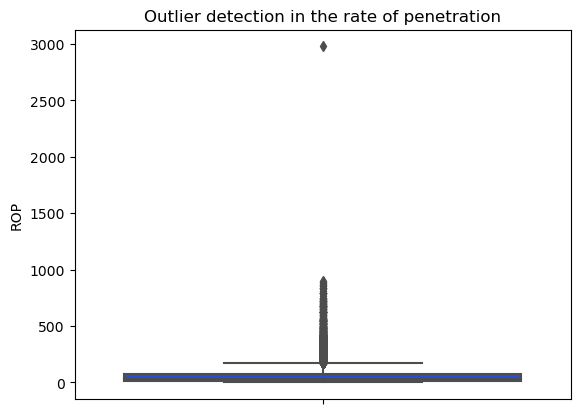

In [34]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['ROP'], palette = "bright")
plt.title('Outlier detection in the rate of penetration')
plt.show()

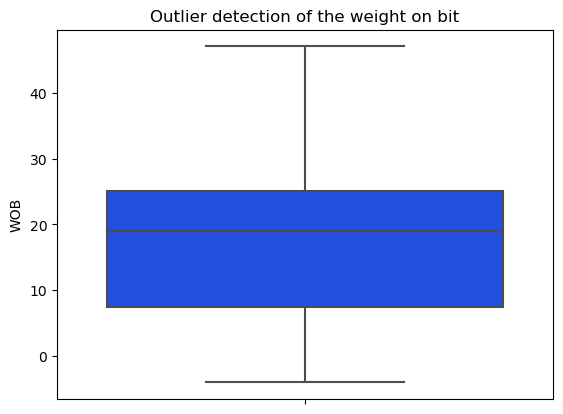

In [35]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['WOB'], palette = "bright")
plt.title('Outlier detection of the weight on bit')
plt.show()

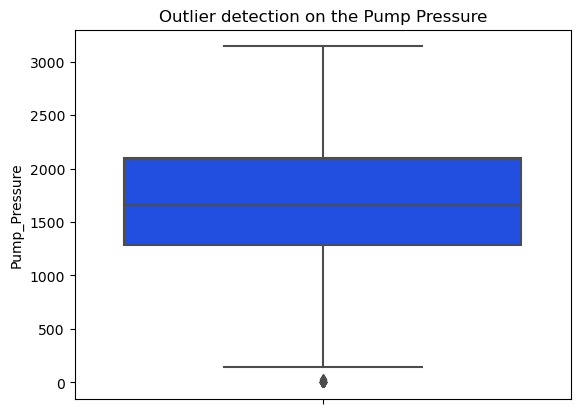

In [36]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['Pump_Pressure'], palette = "bright")
plt.title('Outlier detection on the Pump Pressure')
plt.show()

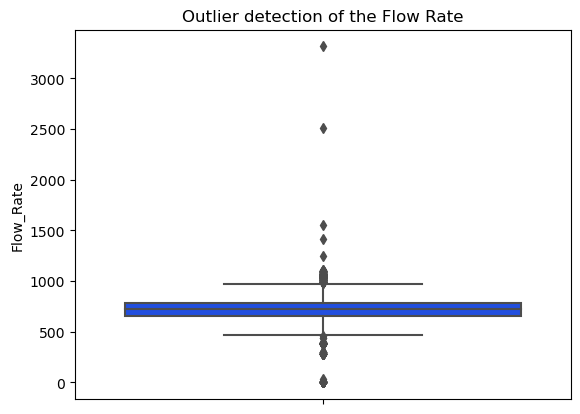

In [37]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['Flow_Rate'], palette = "bright")
plt.title('Outlier detection of the Flow Rate')
plt.show()

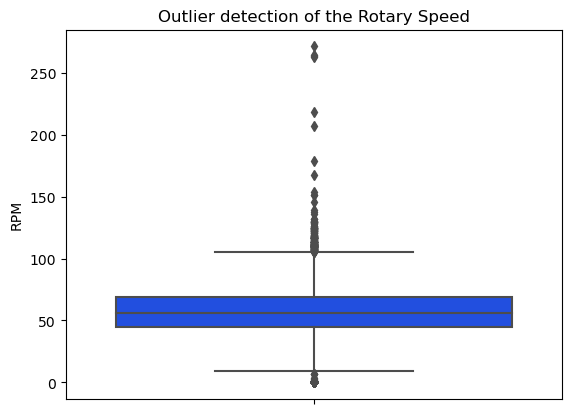

In [38]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['RPM'], palette = "bright")
plt.title('Outlier detection of the Rotary Speed')
plt.show()

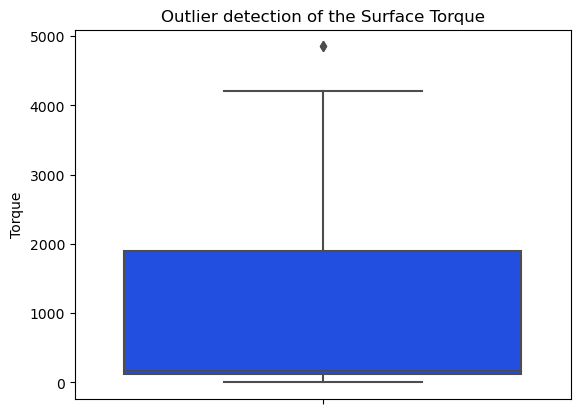

In [39]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['Torque'], palette = "bright")
plt.title('Outlier detection of the Surface Torque')
plt.show()

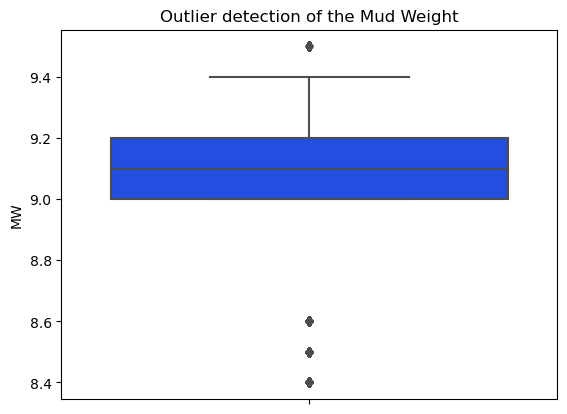

In [40]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['MW'], palette = "bright")
plt.title('Outlier detection of the Mud Weight')
plt.show()

### 2.3.2: Bivariate Analysis

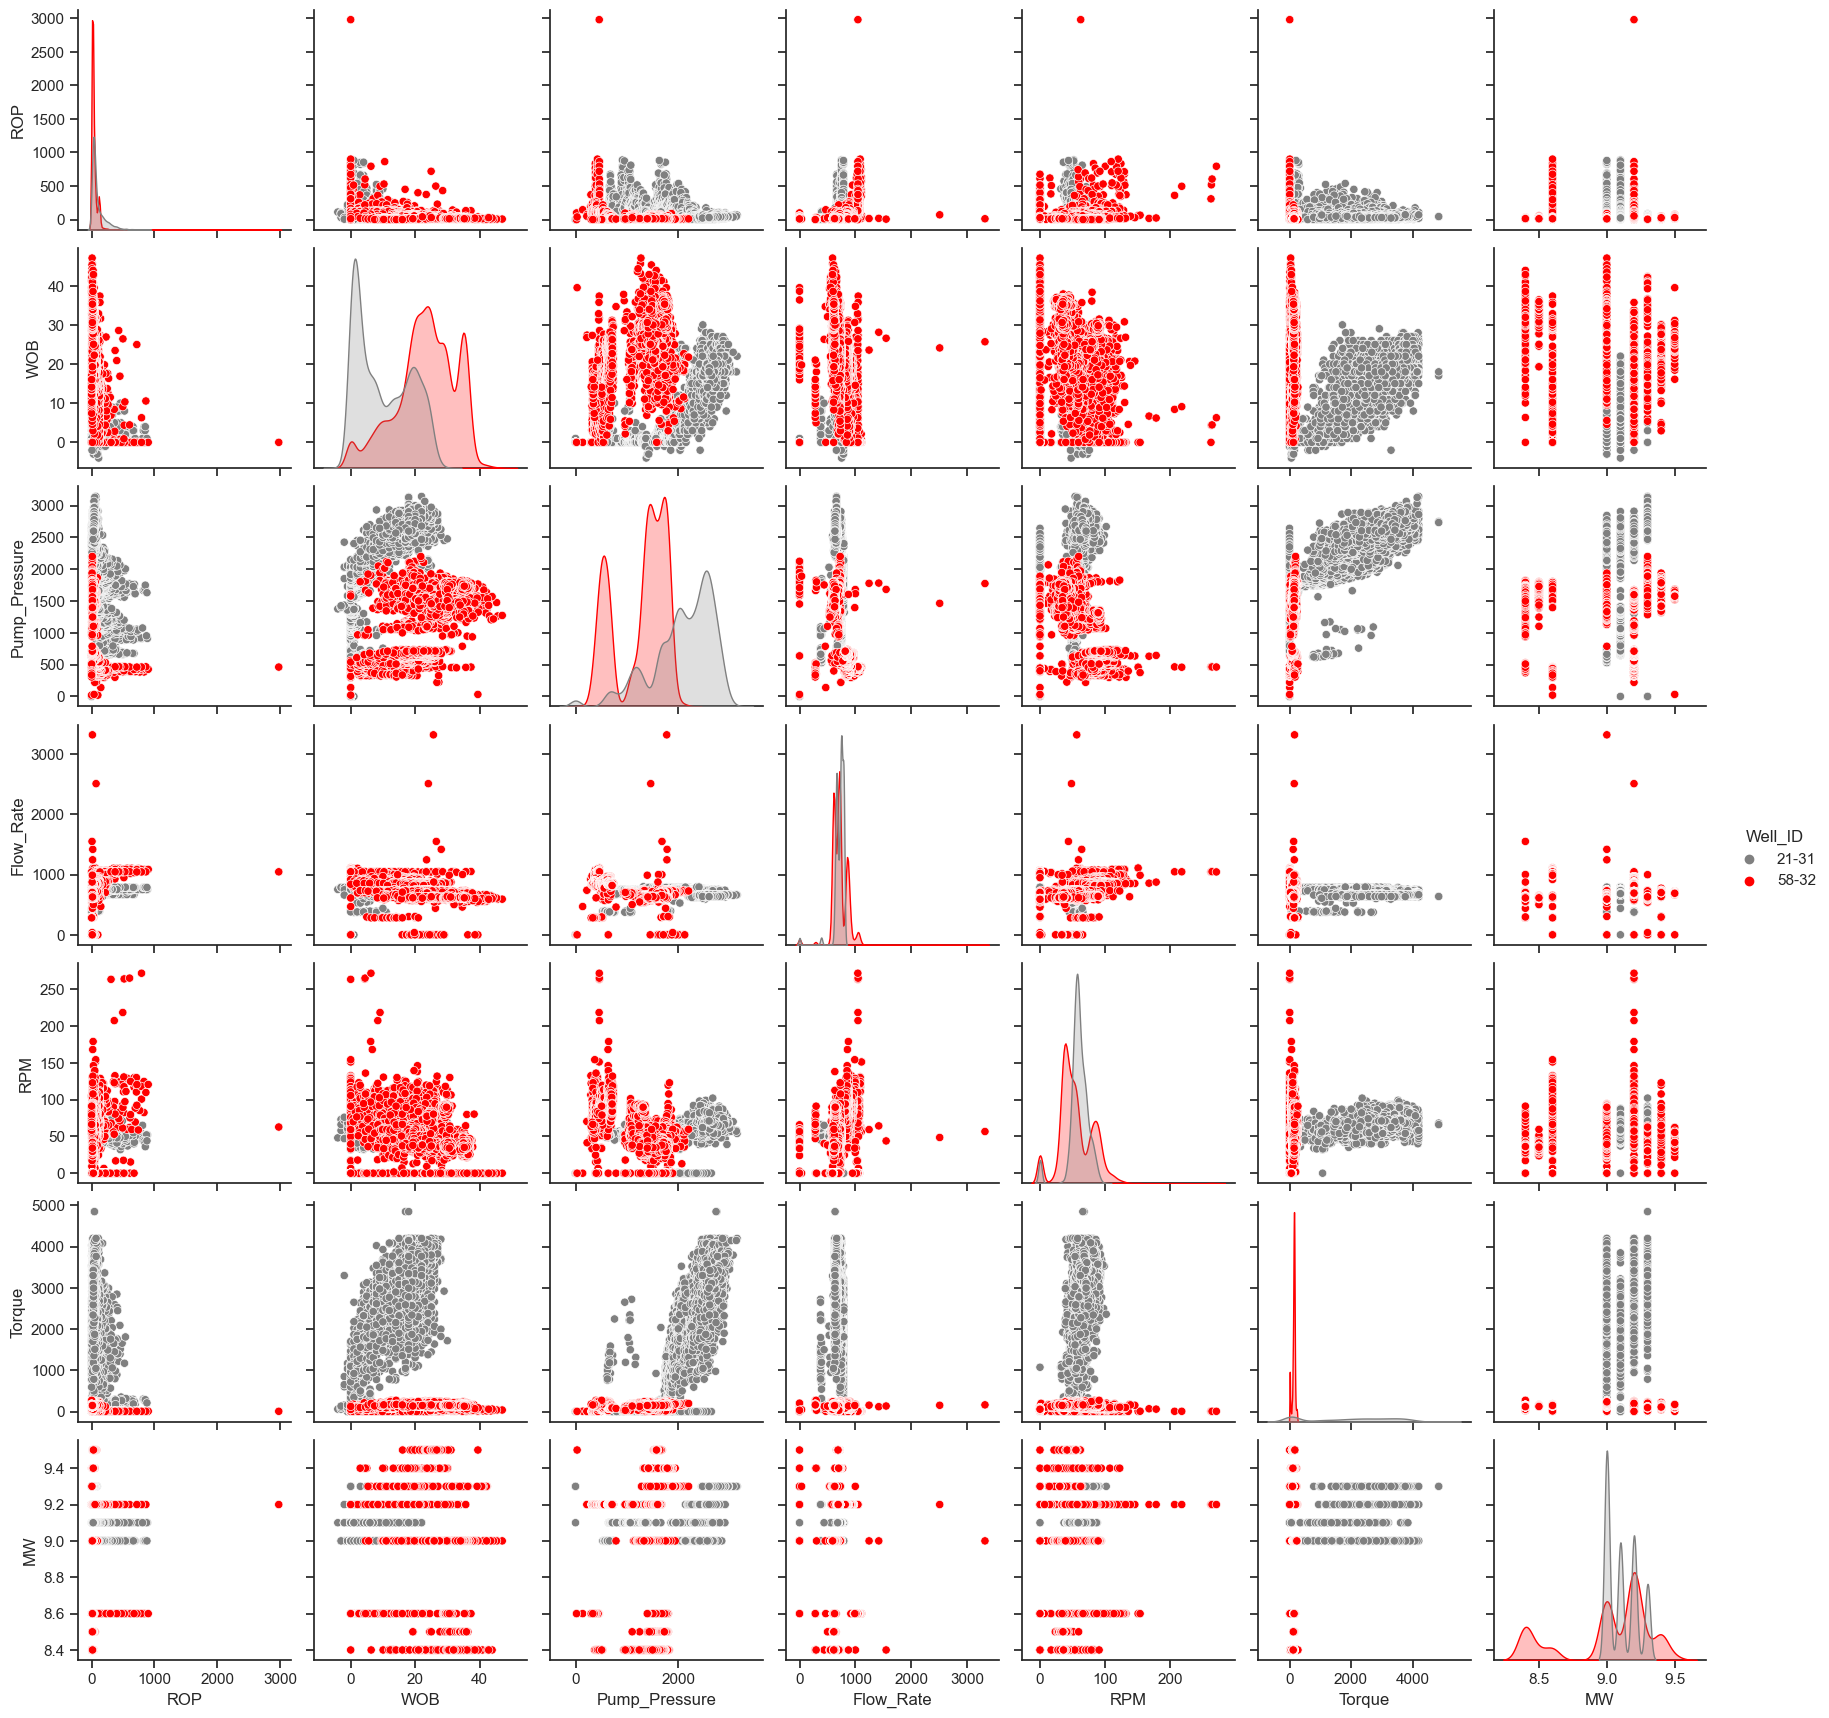

In [41]:
### sns.set(style = 'ticks') # Set the background to dark
# Create an array with the colors you want to use
sns.set(style='ticks')
colors = ['grey', 'red', 'green']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
# Create a pair plot
sns.pairplot(rawdata, y_vars=['ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque',
       'MW'],x_vars=['ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque',
       'MW'], palette = customPalette, hue = 'Well_ID') 

In [42]:
# Capping the observed outliers
rawdata = rawdata[rawdata['ROP'] < 750]
rawdata = rawdata[rawdata['ROP'] > 0]
rawdata = rawdata[rawdata['WOB'] > 0]
rawdata = rawdata[rawdata['Pump_Pressure'] > 0]
rawdata = rawdata[rawdata['Flow_Rate'] < 1100]
rawdata = rawdata[rawdata['Flow_Rate'] > 200]
rawdata = rawdata[rawdata['RPM'] < 150]
rawdata = rawdata[rawdata['RPM'] > 0]
rawdata = rawdata[rawdata['Torque'] > 0]
rawdata = rawdata[rawdata['Torque'] < 4000]

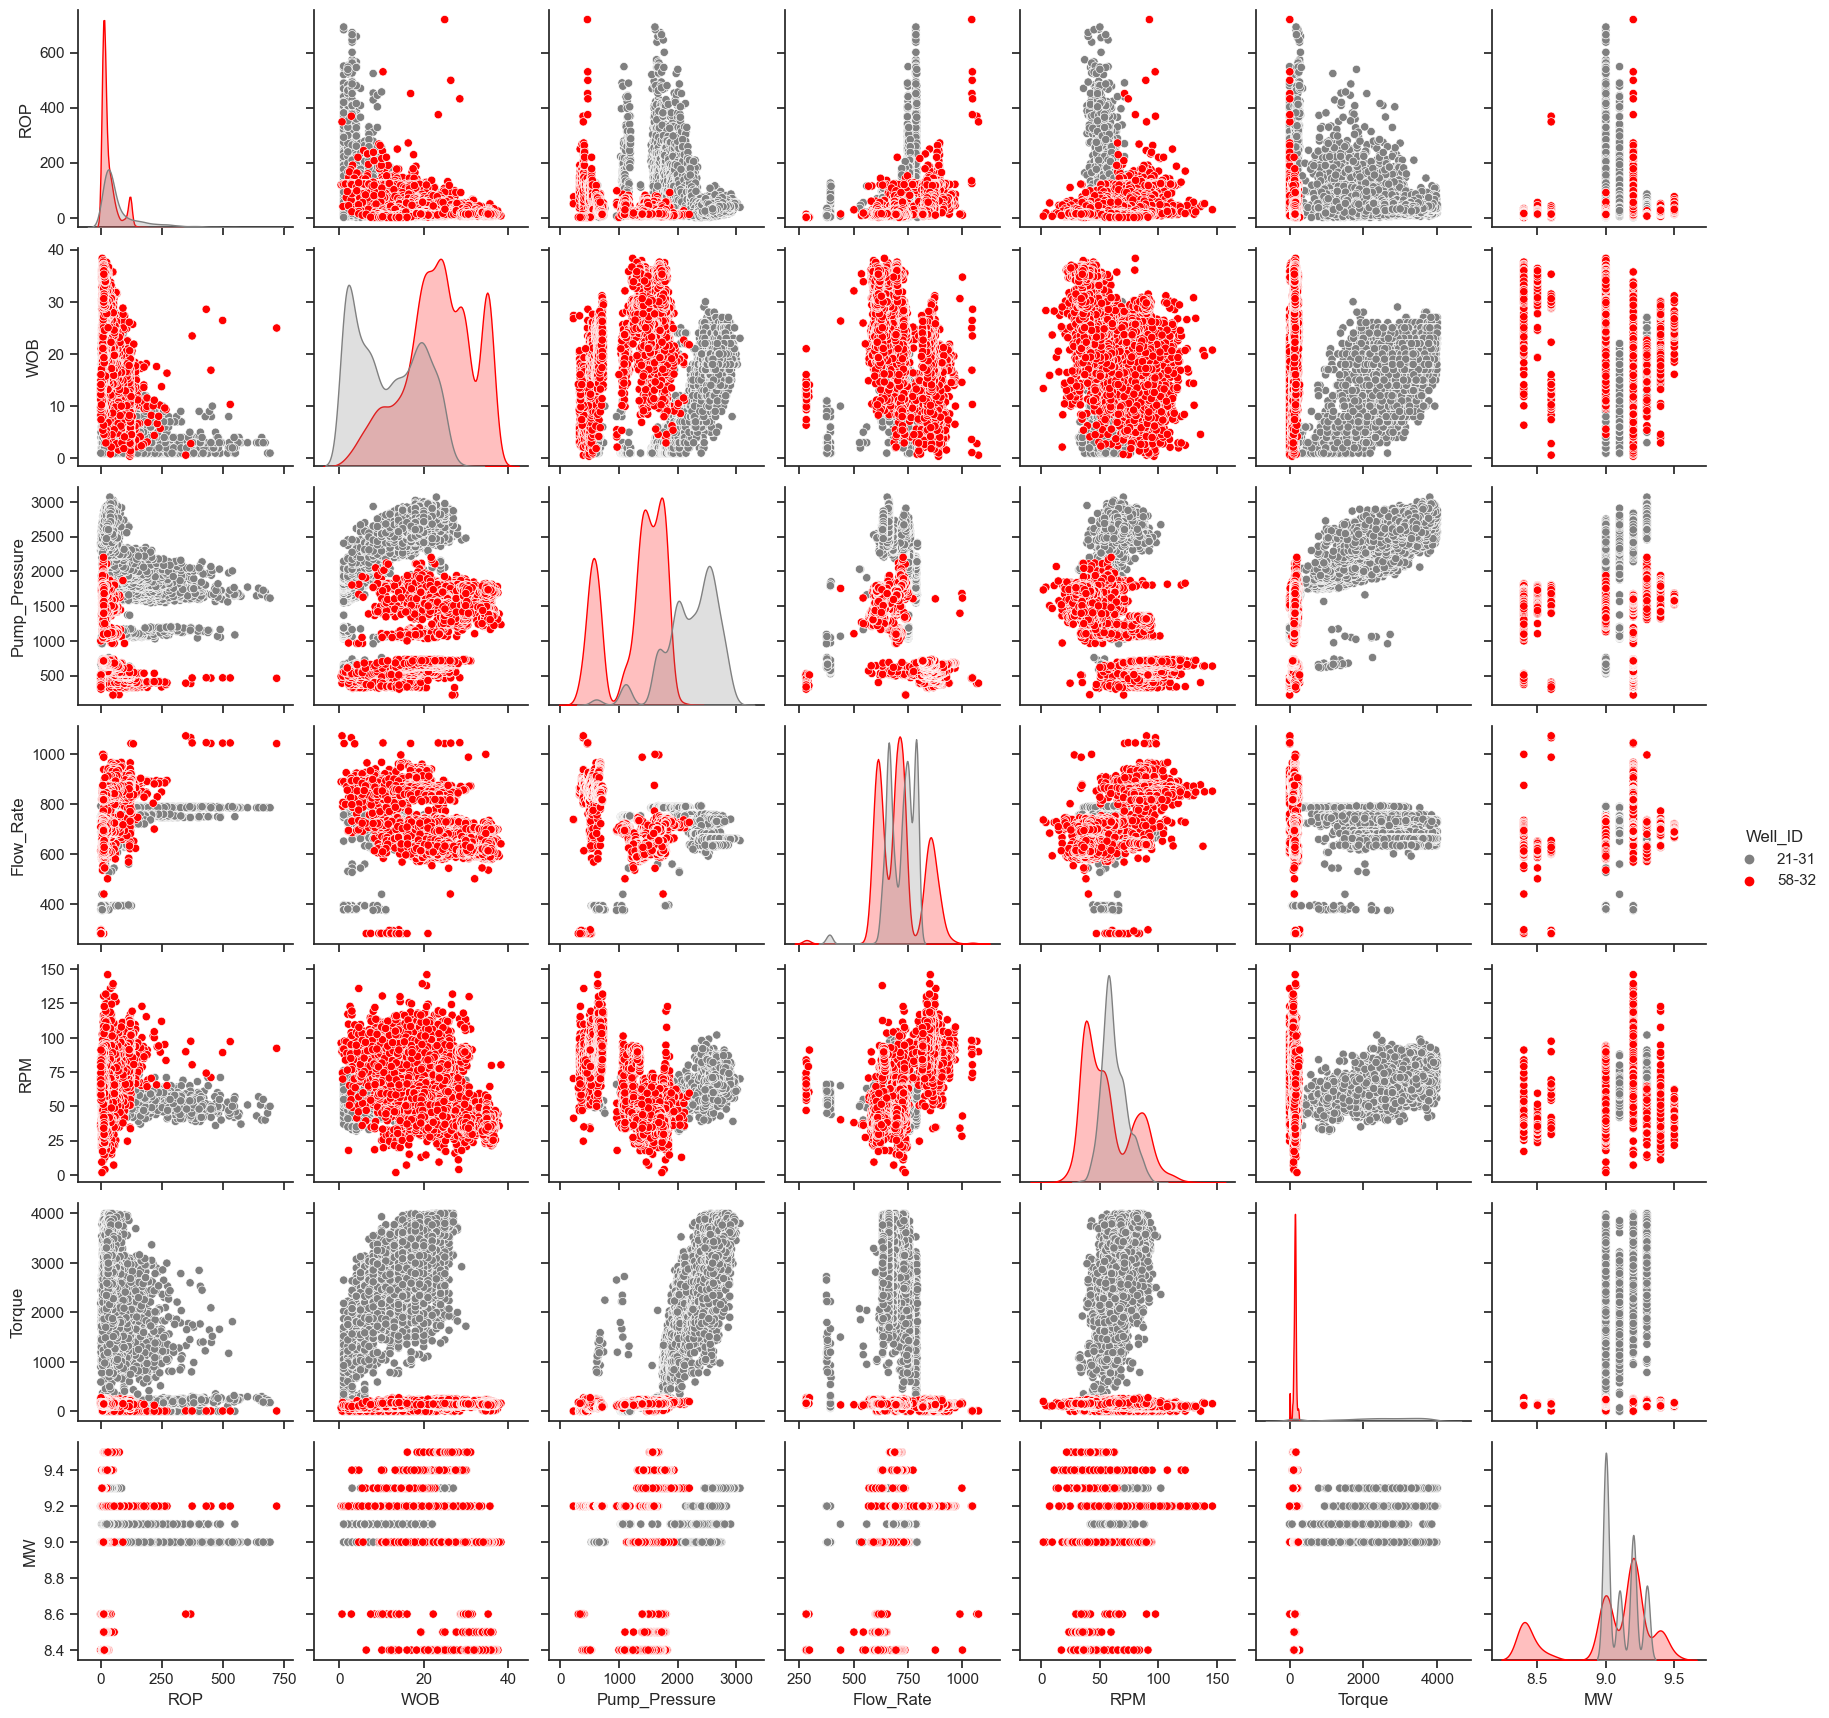

In [43]:
### sns.set(style = 'ticks') # Set the background to dark
# Create an array with the colors you want to use
sns.set(style='ticks')
colors = ['grey', 'red', 'green']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
# Create a pair plot
sns.pairplot(rawdata, y_vars=['ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque',
       'MW'],x_vars=['ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque',
       'MW'], palette = customPalette, hue = 'Well_ID') 

**Inferences**

From the above analysis, the following inferences were obtained.
* Outliers were identified in the ROP features and were capped at max of 750 ft/hr and min greater than 0 ft/hr
* Negative values were identified in weight on bit, and was capped at min of 0 klbs
* Outliers were identified in the flow rate feature and was capped at max of 1100 gpm and min of 200 gpm
* Outliers were identified in the RPM feature and was capped at max  150 RPM and min greater than o RPM
* It appears that there seems to be outliers in the MW feature, however from domain knowledge, they are not outliers., rather they represent actual values used in the field.
* Seepage Loss, Partial Loss, Severe Loss, and Total Losses can be collapsed into "Lost Circulation" as they represent the different types of lost circulation.

In [44]:
rawdata.describe()

DEPTH           ROP           WOB  Pump_Pressure     Flow_Rate  \
count  11620.000000  11620.000000  11620.000000   11620.000000  11620.000000   
mean    3713.259188     54.942890     18.485453    1683.589735    715.244885   
std     1900.016179     73.504777      9.993161     656.832819     87.991109   
min      114.500000      0.710000      0.400000     220.480000    280.660000   
25%     2132.967500     14.127500     10.000000    1353.010000    659.000000   
50%     3642.070000     29.000000     19.715000    1703.030000    717.000000   
75%     5278.140000     59.020000     25.130000    2170.000000    763.125000   
max     7536.250000    719.990000     38.320000    3067.000000   1073.920000   

                RPM       Torque            MW    Mohs_Scale  
count  11620.000000  11620.00000  11620.000000  11620.000000  
mean      59.299104   1017.06217      9.064346      6.182788  
std       18.061114   1281.32723      0.256946      0.840302  
min        1.690000      0.16000      8.400000      5.000000  
25%       46.000000    135.51000      9.000000      5.000000  
50%       57.000000    163.09000      9.100000      6.500000  
75%       71.000000   2089.00000      9.200000      7.000000  
max      146.030000   3999.00000      9.500000      7.000000

# 3. Exploratory Data Analysis

In [45]:
# create a copy of cleaned data
df_explore = rawdata.copy()

### 3.1: Visualization of Features Distribution

Text(0.5, 1.0, 'ROP Distribution')

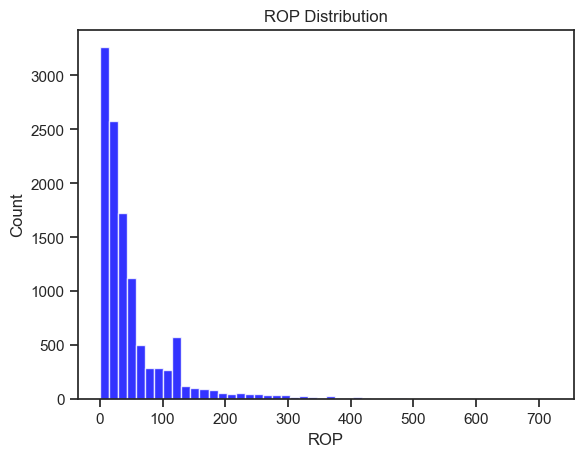

In [46]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(rawdata['ROP'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('ROP Distribution')

Text(0.5, 1.0, 'WOB Distribution')

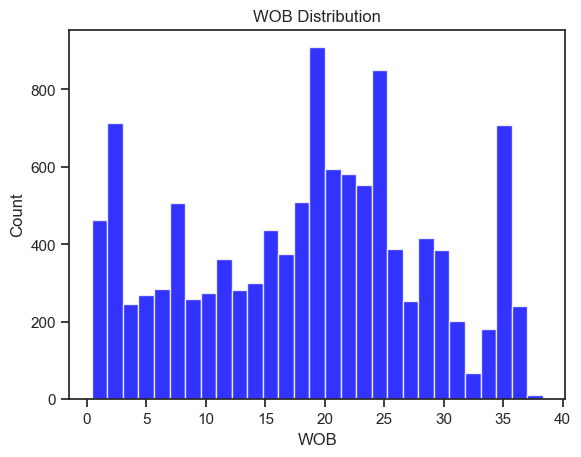

In [47]:
# Visualize the distribution of the Weight on Bit (WOB)
sns.distplot(rawdata['WOB'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('WOB Distribution')

Text(0.5, 1.0, 'Pump Pressure Distribution')

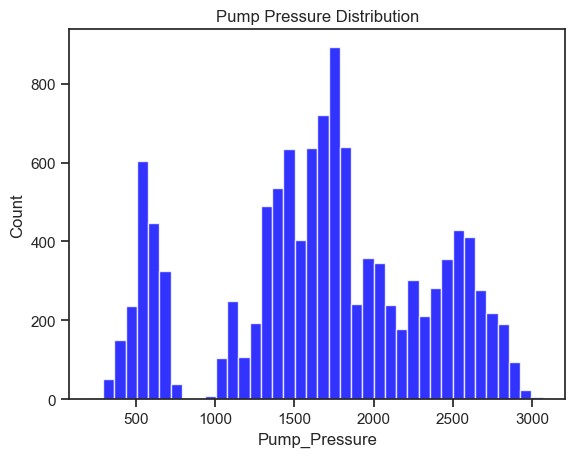

In [48]:
# Visualize the distribution of Pump Pressure
sns.distplot(rawdata['Pump_Pressure'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Pump Pressure Distribution')

Text(0.5, 1.0, 'Flow Rate Distribution')

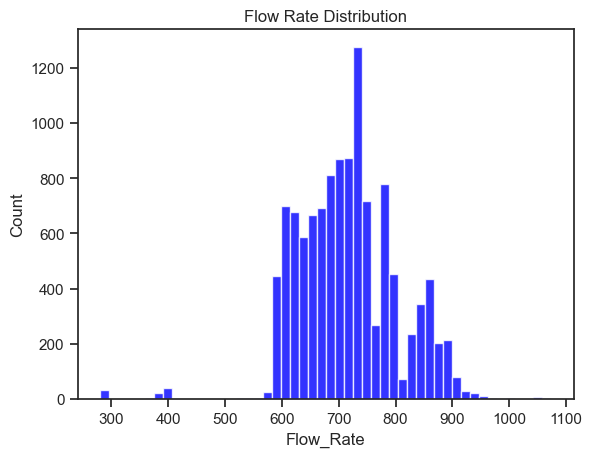

In [49]:
# Visualize the distribution of the Flow Rate
sns.distplot(rawdata['Flow_Rate'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Flow Rate Distribution')

Text(0.5, 1.0, 'Rotary Speed Distribution')

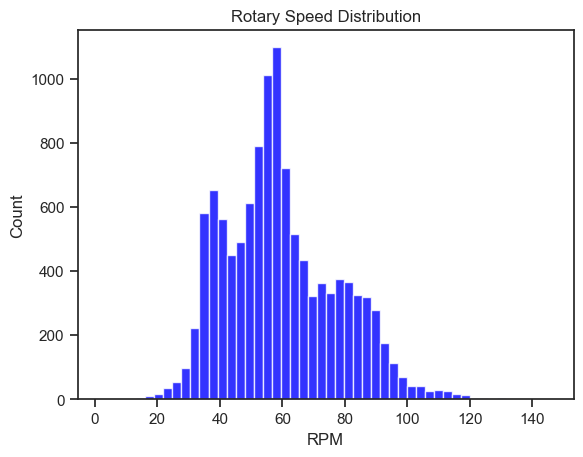

In [50]:
# Visualize the distribution of the Rotary Speed (RPM)
sns.distplot(rawdata['RPM'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Rotary Speed Distribution')

Text(0.5, 1.0, 'Torque Distribution')

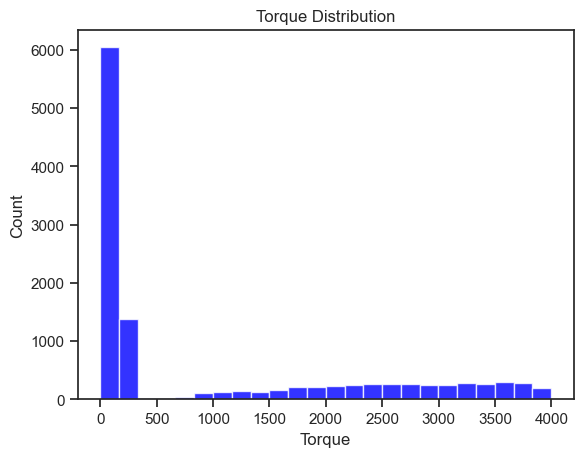

In [51]:
# Visualize the distribution of Torque
sns.distplot(rawdata['Torque'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Torque Distribution')

Text(0.5, 1.0, 'Mud Weight Distribution')

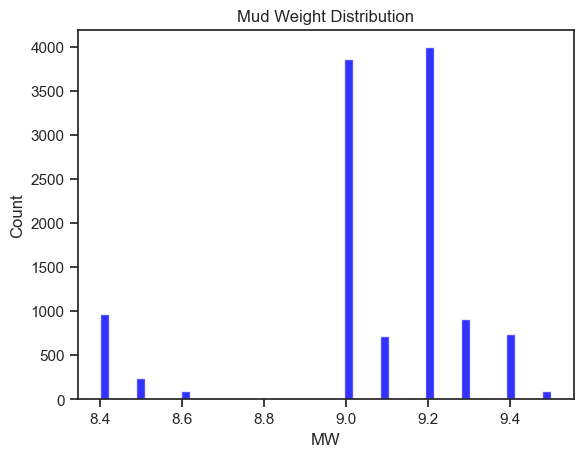

In [52]:
# Visualize the distribution of Mud Weight
sns.distplot(rawdata['MW'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Mud Weight Distribution')

In [53]:
rawdata.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque   MW  \
227  357.0  222.0  1.0         1029.0      750.0  71.0     2.0  9.1   
228  358.0  490.0  1.0         1052.0      750.0  71.0     2.0  9.1   
230  360.0  549.0  2.0         1085.0      750.0  57.0     1.0  9.1   
231  361.0  478.0  1.0         1066.0      750.0  60.0     2.0  9.1   
234  364.0  396.0  1.0         1041.0      750.0  68.0     2.0  9.1   

          Lithology Well_ID  Mohs_Scale Hardness_Type  
227  Sandstone Clay   21-31         5.0        Medium  
228  Sandstone Clay   21-31         5.0        Medium  
230  Sandstone Clay   21-31         5.0        Medium  
231  Sandstone Clay   21-31         5.0        Medium  
234  Sandstone Clay   21-31         5.0        Medium

### 3.2: Visualization of Features Distribution according to Lithology Hardness Type

In [54]:
# group by the Lithology Hardness Type and determine the mean of each feature
df_p11 = rawdata.groupby(['Hardness_Type']).mean()
df_p11 = df_p11.reset_index()
df_p11.head()

Hardness_Type        DEPTH         ROP        WOB  Pump_Pressure  \
0          Hard  4706.708317   29.718531  20.948781    1976.249883   
1        Medium  1630.801340  107.817932  13.321849    1070.118542   

    Flow_Rate        RPM       Torque        MW  Mohs_Scale  
0  679.253393  54.492162  1389.703674  9.023491    6.744884  
1  790.689880  69.375366   235.934881  9.149987    5.004530

Text(0.5, 1.0, 'Averge ROP according to Rock Hardness')

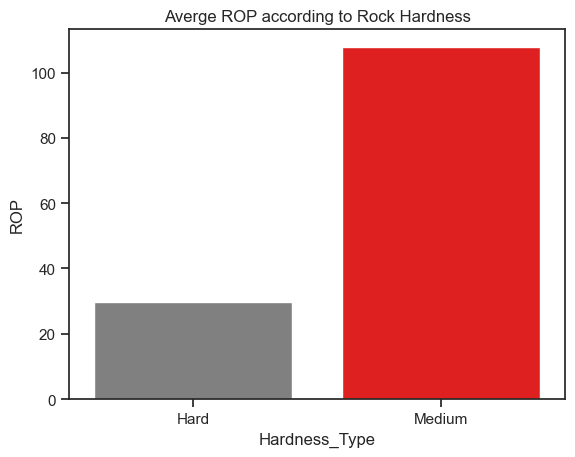

In [55]:
sns.barplot(x=df_p11["Hardness_Type"], y=df_p11["ROP"])
plt.title('Averge ROP according to Rock Hardness')

From the above plot, the rate of penetration is averagely 46 for the hard formation type and averagely 108 for the medium formation. This is logical as drilling rate increases in softer formations when other controllable driling parameters are kept constant.

Text(0.5, 1.0, 'Averge Torque according to Rock Hardness')

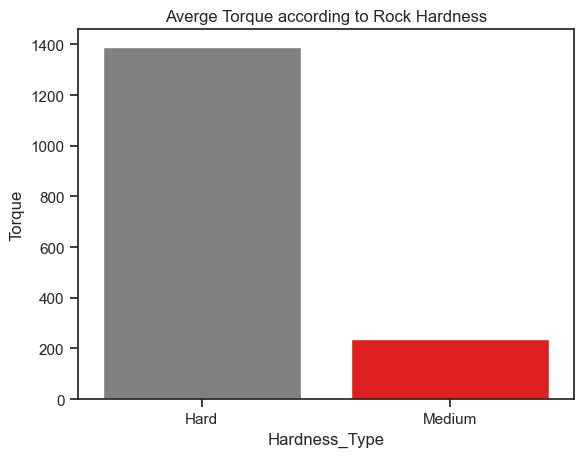

In [56]:
sns.barplot(x=df_p11["Hardness_Type"], y=df_p11["Torque"])
plt.title('Averge Torque according to Rock Hardness')

From the above plot, there are higher torque values for the hard formation and relatively lower values for the soft formation. It is a normal drilling phenomenon to experience higher torque values in hard formations because of the high resistance caused by hard rocks on the drill string.

Text(0.5, 1.0, 'Averge Rotary Speed according to Rock Hardness')

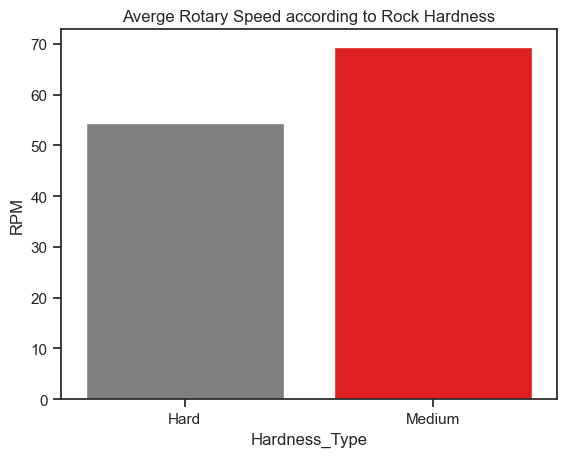

In [57]:
sns.barplot(x=df_p11["Hardness_Type"], y=df_p11["RPM"])
plt.title('Averge Rotary Speed according to Rock Hardness')

Text(0.5, 1.0, 'Averge Pump Pressure according to Rock Hardness')

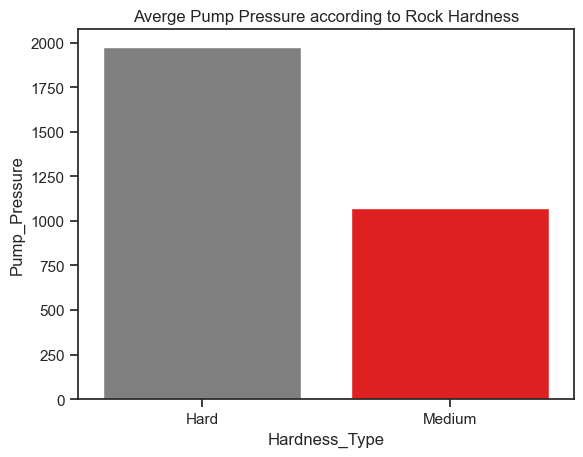

In [58]:
sns.barplot(x=df_p11["Hardness_Type"], y=df_p11["Pump_Pressure"])
plt.title('Averge Pump Pressure according to Rock Hardness')

While drilling through hard formations, Pump pressure are increased to help drill bits cutting ability by cracking the formation through high jetting force

Text(0.5, 1.0, 'Averge Flow Rate according to Rock Hardness')

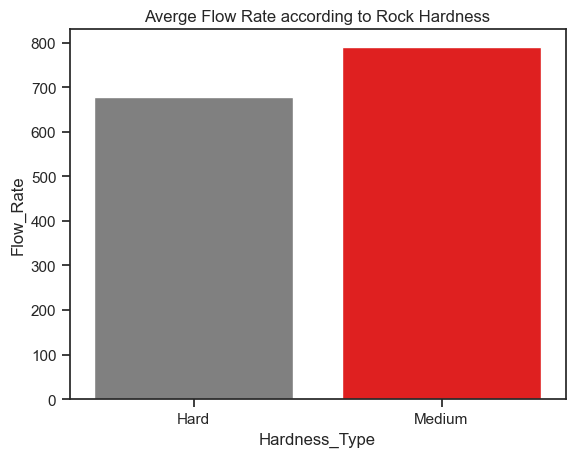

In [59]:
sns.barplot(x=df_p11["Hardness_Type"], y=df_p11["Flow_Rate"])
plt.title('Averge Flow Rate according to Rock Hardness')

Due to the high rate of penetration in medium formations, more cuttings will be generated. Higher flowrate are needed to ennsure the efficient removal of the cuttings from the wellbore to prevent stuck pipe, wellbore instability, increased torque and drag, and reduced drilling efficiency.

### 3.3: Correlation plot (Heatmap) of numerical features

Text(0.5, 1.0, 'Correlation map of Numerical Variables')

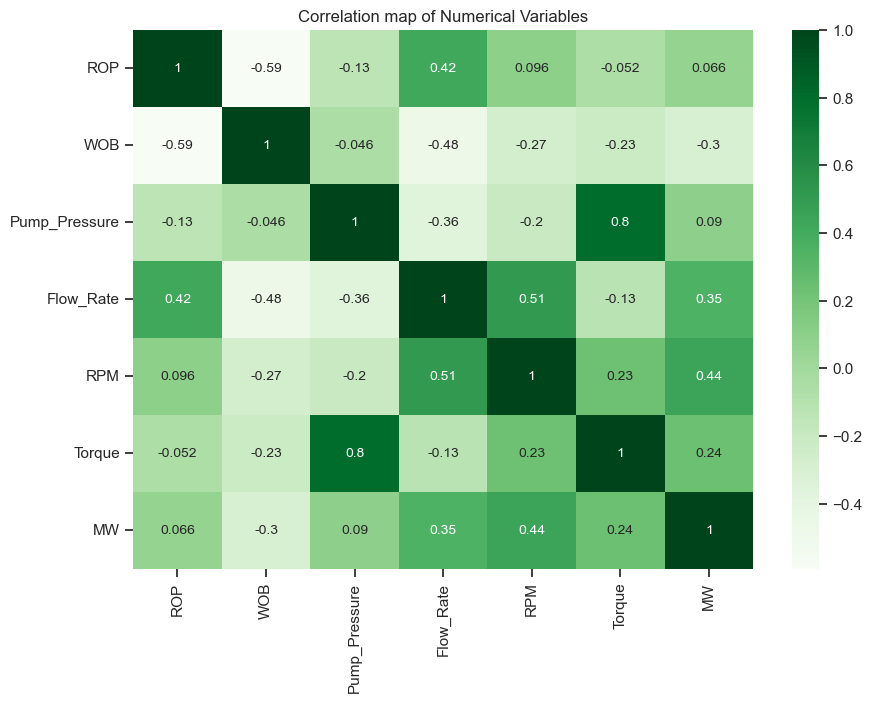

In [60]:
df_feature_num = df_explore[['ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate','RPM', 'Torque', 'MW']]
# make a correlation plot (heatmap) to visualize the numerical variables
corr_mx = df_feature_num.corr()
f, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':10}, cmap='Greens')
plt.title('Correlation map of Numerical Variables')

Multicollinearity was observed between Pump_Pressure and Torque. Torque will be dropped because of it's least correlation to the target variable (ROP).

# 4. Feature Engineering

The objective is to compare feature creation techniques and feature extraction technique and their corresponding impact on the predictive models.

### 4.1: Feature Creation
Feature Creation techniques were employed to transform categorical variables to numerical variables

#### 4.1.1: One Hot Encoding

One-hot encoding is a feature creation technique that converts categorical data into binary. It maps category to a vector that contains 1 or 0 denoting the presence of the feature or not. It produces the number of columns equal to the number of categories.

One-hot encoding is used to convert the Hardness_Type (categorical variable) into a binary (Hardness_M and Hardness_H) for ROP prediction

Reference: Spring 2023 project (http://localhost:8889/notebooks/Downloads/Spring%202023%20Project%201-1-Copy2-1.ipynb)

In [61]:
rawdata1 = rawdata.copy()
rawdata1.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque   MW  \
227  357.0  222.0  1.0         1029.0      750.0  71.0     2.0  9.1   
228  358.0  490.0  1.0         1052.0      750.0  71.0     2.0  9.1   
230  360.0  549.0  2.0         1085.0      750.0  57.0     1.0  9.1   
231  361.0  478.0  1.0         1066.0      750.0  60.0     2.0  9.1   
234  364.0  396.0  1.0         1041.0      750.0  68.0     2.0  9.1   

          Lithology Well_ID  Mohs_Scale Hardness_Type  
227  Sandstone Clay   21-31         5.0        Medium  
228  Sandstone Clay   21-31         5.0        Medium  
230  Sandstone Clay   21-31         5.0        Medium  
231  Sandstone Clay   21-31         5.0        Medium  
234  Sandstone Clay   21-31         5.0        Medium

In [62]:
# Transform categorical varibale (Hardness_Type) into Binary numbers via OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

Cat_1hot = cat_encoder.fit_transform(rawdata1[['Hardness_Type']])

Cat_1hot.toarray()
Cat = pd.DataFrame(Cat_1hot.toarray(), columns=['M', 'H'])
Cat.head()

M    H
0  0.0  1.0
1  0.0  1.0
2  0.0  1.0
3  0.0  1.0
4  0.0  1.0

In [63]:
rawdata1 = rawdata1.drop(columns= ['DEPTH', 'Lithology', 'ROP', 'Torque', 'Mohs_Scale', 'Well_ID', 'Hardness_Type'])
rawdata1.head()

WOB  Pump_Pressure  Flow_Rate   RPM   MW
227  1.0         1029.0      750.0  71.0  9.1
228  1.0         1052.0      750.0  71.0  9.1
230  2.0         1085.0      750.0  57.0  9.1
231  1.0         1066.0      750.0  60.0  9.1
234  1.0         1041.0      750.0  68.0  9.1

**Scaling**

In [64]:
from sklearn.preprocessing import MinMaxScaler

#Scale data using MinMax
scaler = MinMaxScaler() 
#Fit the whole set of data in the scaler and scale it 
mm_scaler = scaler.fit(rawdata1)

#Transform the train data to scaled 
x_Onehot = mm_scaler.transform(rawdata1)
x_Onehot = pd.DataFrame(x_Onehot, columns=rawdata1.columns)
x_Onehot.head()

WOB  Pump_Pressure  Flow_Rate       RPM        MW
0  0.015823       0.284038    0.59166  0.480186  0.636364
1  0.015823       0.292118    0.59166  0.480186  0.636364
2  0.042194       0.303711    0.59166  0.383192  0.636364
3  0.015823       0.297036    0.59166  0.403977  0.636364
4  0.015823       0.288254    0.59166  0.459401  0.636364

In [65]:
# concatenating values with dataframe
x_Onehot[['Hardness_M']] = Cat[['M']]
x_Onehot[['Hardness_H']] = Cat[['H']]
x_Onehot.head()

WOB  Pump_Pressure  Flow_Rate       RPM        MW  Hardness_M  \
0  0.015823       0.284038    0.59166  0.480186  0.636364         0.0   
1  0.015823       0.292118    0.59166  0.480186  0.636364         0.0   
2  0.042194       0.303711    0.59166  0.383192  0.636364         0.0   
3  0.015823       0.297036    0.59166  0.403977  0.636364         0.0   
4  0.015823       0.288254    0.59166  0.459401  0.636364         0.0   

   Hardness_H  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0

In [66]:
x_Onehot.to_csv(r'C:/Users/sann0002/OneDrive - University of Oklahoma/Documents/Data Analytics/DSA Project/Data/OneHotEncod.csv', index=False)

####  4.1.2: Mean Encoding

Mean encoding is used to encode categorical variables as continous variables. It involves replacing each category in a categorical variable with the mean of the target variable for that category.

Working principle of mean encoding

1. Group the dataset by the categorical variable (Hardness_Type) that needs to be encoded.
2. Calculate the mean of the target variable (ROP) for each category(Medium and Hard).
3. Replace each category(Medium and Hard) with the corresponding mean value (ROP).

Reference: https://www.geeksforgeeks.org/mean-encoding-machine-learning/

In [67]:
rawdata2 = rawdata.copy()
rawdata2.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque   MW  \
227  357.0  222.0  1.0         1029.0      750.0  71.0     2.0  9.1   
228  358.0  490.0  1.0         1052.0      750.0  71.0     2.0  9.1   
230  360.0  549.0  2.0         1085.0      750.0  57.0     1.0  9.1   
231  361.0  478.0  1.0         1066.0      750.0  60.0     2.0  9.1   
234  364.0  396.0  1.0         1041.0      750.0  68.0     2.0  9.1   

          Lithology Well_ID  Mohs_Scale Hardness_Type  
227  Sandstone Clay   21-31         5.0        Medium  
228  Sandstone Clay   21-31         5.0        Medium  
230  Sandstone Clay   21-31         5.0        Medium  
231  Sandstone Clay   21-31         5.0        Medium  
234  Sandstone Clay   21-31         5.0        Medium

In [68]:
# importing TargetEncoder
from category_encoders import TargetEncoder
Targetenc = TargetEncoder()
# transforming the column after fitting
values = Targetenc.fit_transform(X = rawdata2.Hardness_Type, y = rawdata2.ROP)
values = values.rename(columns={'Hardness_Type': 'Hardness_Type_Mean_rop'})
# concatenating values with dataframe
x_meanEncd = pd.concat([rawdata2, values], axis = 1)
x_meanEncd = x_meanEncd.drop(columns= ['DEPTH', 'Lithology', 'ROP', 'Torque', 'Mohs_Scale', 'Well_ID', 'Hardness_Type'])
x_meanEncd.head()

WOB  Pump_Pressure  Flow_Rate   RPM   MW  Hardness_Type_Mean_rop
227  1.0         1029.0      750.0  71.0  9.1              107.817932
228  1.0         1052.0      750.0  71.0  9.1              107.817932
230  2.0         1085.0      750.0  57.0  9.1              107.817932
231  1.0         1066.0      750.0  60.0  9.1              107.817932
234  1.0         1041.0      750.0  68.0  9.1              107.817932

In [69]:
x_meanEncd.to_csv(r'C:/Users/sann0002/OneDrive - University of Oklahoma/Documents/Data Analytics/DSA Project/Data/MeanEncod.csv', index=False)

#### 4.1.3: Frequency Encoding

Frequency encoding is used to convert categorical variables into numberical variables for use by models. It utilizes the frequency of the categorical variables to assign weight in prediction of the target variable. Frequency enconding helps to denote variables of significant importance to the model prediction. 

Frequency encoding is used to convert the Hardness_Type (categorical variable) into a numerical variable (Hardness_Type_freq_encode) for ROP prediction

Reference: https://www.geeksforgeeks.org/feature-encoding-techniques-machine-learning/

In [70]:
rawdata3 = rawdata.copy()
rawdata3.head()

DEPTH    ROP  WOB  Pump_Pressure  Flow_Rate   RPM  Torque   MW  \
227  357.0  222.0  1.0         1029.0      750.0  71.0     2.0  9.1   
228  358.0  490.0  1.0         1052.0      750.0  71.0     2.0  9.1   
230  360.0  549.0  2.0         1085.0      750.0  57.0     1.0  9.1   
231  361.0  478.0  1.0         1066.0      750.0  60.0     2.0  9.1   
234  364.0  396.0  1.0         1041.0      750.0  68.0     2.0  9.1   

          Lithology Well_ID  Mohs_Scale Hardness_Type  
227  Sandstone Clay   21-31         5.0        Medium  
228  Sandstone Clay   21-31         5.0        Medium  
230  Sandstone Clay   21-31         5.0        Medium  
231  Sandstone Clay   21-31         5.0        Medium  
234  Sandstone Clay   21-31         5.0        Medium

In [71]:
# grouping by frequency
fq = rawdata3.groupby('Hardness_Type').size()/len(rawdata3)
# mapping values to dataframe
rawdata3.loc[:, "{}_freq_encode".format('Hardness_Type')] = rawdata3['Hardness_Type'].map(fq)
# drop original column.
x_FreqEncd = rawdata3.drop(columns= ['DEPTH', 'Lithology', 'ROP', 'Torque', 'Mohs_Scale', 'Well_ID', 'Hardness_Type'])
x_FreqEncd.head()

WOB  Pump_Pressure  Flow_Rate   RPM   MW  Hardness_Type_freq_encode
227  1.0         1029.0      750.0  71.0  9.1                   0.322978
228  1.0         1052.0      750.0  71.0  9.1                   0.322978
230  2.0         1085.0      750.0  57.0  9.1                   0.322978
231  1.0         1066.0      750.0  60.0  9.1                   0.322978
234  1.0         1041.0      750.0  68.0  9.1                   0.322978

In [72]:
x_FreqEncd.to_csv(r'C:/Users/sann0002/OneDrive - University of Oklahoma/Documents/Data Analytics/DSA Project/Data/PCAFreq.csv', index=False)

#### 4.2: Feature Extraction
Feature Extraction techniques were employed to extract new features and reduce the dimensionality of large datasets

#### 4.2.1: Principal Component Analysis (PCA) 

Principal Component Analysis (PCA) is a technique used in machine learning and data science to reduce the dimensionality of large datasets while retaining most of the variability in the data.

PCA works by transforming the original variables into a new set of variables, called principal components, which are linear combinations of the original variables. These principal components are chosen in such a way that the first principal component captures the maximum amount of variability in the data, the second principal component captures the maximum amount of variability that is orthogonal to the first principal component, and so on.

The Principal Component Analysis will be done only on the numerical data generated from the total dataframe generated from One Hot Encoding

First, before implementing the dimensionality technique (particurly the PCA and for consistency across all the reduction techniques choice), data needs to be scaled and it is a rule of thumb to make use of the StandardScaler. This is because, for variances to be measured and to have optimal ratio differences, the mean has to be zero with a unit variance. Other scaler methods will not produce this conditions like Standardscalar would, hence the suitability.

**Reference**

1.) https://en.m.wikipedia.org/wiki/Principal_component_analysis

2.) https://www.researchgate.net/post/Is-it-necessary-to-normalize-data-before-performing-principle-component-analysis

In [73]:
# extract and independednt features(x)
x_Ofeature = rawdata[['WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque', 'MW']]

In [74]:
# create list of column names to use later
col_names1 = list(x_Ofeature)
print(col_names1)

['WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque', 'MW']


**Standardization (Standard Scalar)**

In [75]:
# Implement standard scalar on drilling data prior to PCA analysis
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
df_s3 = s_scaler.fit_transform(x_Ofeature)

df_s3 = pd.DataFrame(df_s3, columns=col_names1)
df_s3.head()

WOB  Pump_Pressure  Flow_Rate       RPM   Torque        MW
0 -1.749817      -0.996628   0.395001  0.647878 -0.79223  0.138767
1 -1.749817      -0.961610   0.395001  0.647878 -0.79223  0.138767
2 -1.649745      -0.911367   0.395001 -0.127301 -0.79301  0.138767
3 -1.749817      -0.940295   0.395001  0.038809 -0.79223  0.138767
4 -1.749817      -0.978358   0.395001  0.481768 -0.79223  0.138767

Text(0.5, 1.0, "Variance Explained by PCA's")

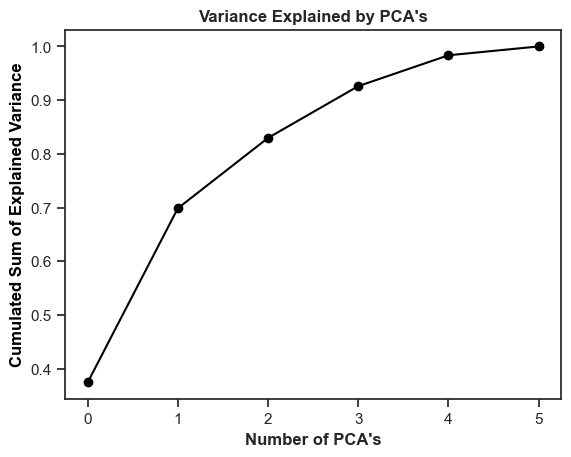

In [76]:
# Find the optimal number of PCA 
df_PCA3 = df_s3[['WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque', 'MW']]# Define the required data for this analysis
from sklearn.decomposition import PCA
pca5 = PCA(n_components=df_PCA3.shape[1])
pca5.fit(df_PCA3)
ratios = pca5.explained_variance_ratio_

# Plot the explained variance ratios
x = np.arange(df_PCA3.shape[1])
plt.plot(x, np.cumsum(ratios), '-o', color = 'black')
plt.xlabel("Number of PCA's", fontsize=12, weight = 'bold')
plt.ylabel("Cumulated Sum of Explained Variance",fontsize=12, weight = 'bold', color = 'black')
plt.title("Variance Explained by PCA's", fontsize=12, weight = 'bold')

In [77]:
# extract the explained variance ratio for individual components.
pca5.explained_variance_ratio_

array([0.37433997, 0.3242757 , 0.13104788, 0.0963695 , 0.0574944 ,
       0.01647256])

**Comment**

In this technique, PCA was used to reduce the dimension of the data and reduce potential multicollinearity that could exist in the data

In [78]:
# Importing PCA from Sklearn
from sklearn.decomposition import PCA

# Creating PCA object
pca6 = PCA(n_components=6)               
principalComponents = pca6.fit_transform(df_PCA3)

#Creating the dataframe
x_PCA3 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
x_PCA3.head()

PC1       PC2       PC3       PC4       PC5       PC6
0  1.356235  1.151546 -0.989604 -0.026062  1.045670  0.197311
1  1.353400  1.127670 -0.992547 -0.027898  1.035112  0.220216
2  0.900472  1.076112 -1.282597 -0.452232  0.744201 -0.018161
3  1.034784  1.092044 -1.278101 -0.366062  0.847860  0.026114
4  1.268332  1.133336 -1.068529 -0.118942  0.990845  0.152522

#### 4.2.2: Multiple Correspondence Analysis

Multiple Correspondence Analysis (MCA) is used to analyze categorical data with multiple variables. MCA is an extension of Principal Component Analysis (PCA) for categorical data, and it works by transforming the original categorical variables into a new set of variables called principal components.

The binary variable (Hardness_M and Hardness_H) gotten from One-hot encoding were transformed into two sets of principal components (MCA1 and MCA2, which are continuous variables)

**Comment**

For MCA to work, ensure prince package version 0.7.1 is completely downloaded using this code


!pip install prince==0.7.1

In [79]:
from prince import MCA
# Load the data
data = x_Onehot[['Hardness_M', 'Hardness_H']]
# Perform MCA
mca = MCA(n_components=2, n_iter = 3, random_state=42)
mca.fit(data)
results = mca.transform(data)
new_columns = ['MCA1', 'MCA2']
results.columns = new_columns
results.head()

MCA1  MCA2
0  1.447822  -1.0
1  1.447822  -1.0
2  1.447822  -1.0
3  1.447822  -1.0
4  1.447822  -1.0

In [80]:
# concatenating values with dataframe
x_PCA_Onehot = x_PCA3.copy()
x_PCA_Onehot['MCA1'] = results['MCA1']
x_PCA_Onehot['MCA2'] = results['MCA2']
x_PCA_Onehot.head()

PC1       PC2       PC3       PC4       PC5       PC6      MCA1  MCA2
0  1.356235  1.151546 -0.989604 -0.026062  1.045670  0.197311  1.447822  -1.0
1  1.353400  1.127670 -0.992547 -0.027898  1.035112  0.220216  1.447822  -1.0
2  0.900472  1.076112 -1.282597 -0.452232  0.744201 -0.018161  1.447822  -1.0
3  1.034784  1.092044 -1.278101 -0.366062  0.847860  0.026114  1.447822  -1.0
4  1.268332  1.133336 -1.068529 -0.118942  0.990845  0.152522  1.447822  -1.0

# 5. Model Development

### 5.1.1: Baseline Model  (Comparison of feature combinations using Linear Regression)

In [81]:
# Fit the baseline model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# Define the function to return the MAPE values
def MAPE(Y_actual,Y_Predicted):
    Y_actual = np.array(Y_actual)
    Y_Predicted = np.array(Y_Predicted)
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#### 5.1.1.1: Linear Regression (One Hot Encoding)

In [82]:
# split data into train and validation data
y = rawdata['ROP']
X_trainOH, X_validOH, y_trainOH, y_validOH = train_test_split(x_Onehot, y, test_size=0.2, random_state=42)

In [83]:
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_trainOH, y_trainOH)

y_pred_reg = reg.predict(X_validOH)
print("MSE:", mean_squared_error(y_validOH,y_pred_reg))
print("R2:", r2_score(y_validOH,y_pred_reg))
print("MAPE:", MAPE(y_validOH,y_pred_reg))
print("MAE:", mean_absolute_error(y_validOH,y_pred_reg))

MSE: 2726.231423559587
R2: 0.5068570803226218
MAPE: 132.2530648540724
MAE: 32.414342326764675


#### 5.1.1.2: Linear Regression (Mean Encoding)

In [84]:
# split data into train and validation data
y = rawdata['ROP']
X_trainME, X_validME, y_trainME, y_validME = train_test_split(x_meanEncd, y, test_size=0.2, random_state=42)

In [85]:
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_trainME, y_trainME)

y_pred_reg = reg.predict(X_validME)
print("MSE:", mean_squared_error(y_validME,y_pred_reg))
print("R2:", r2_score(y_validME,y_pred_reg))
print("MAPE:", MAPE(y_validME,y_pred_reg))
print("MAE:", mean_absolute_error(y_validME,y_pred_reg))

MSE: 2726.231423559586
R2: 0.506857080322622
MAPE: 132.25306485407202
MAE: 32.414342326764654


#### 5.1.1.3: Linear Regression (Frequency Encoding)

In [86]:
# split data into train and validation data
y = rawdata['ROP']
X_trainFE, X_validFE, y_trainFE, y_validFE = train_test_split(x_FreqEncd, y, test_size=0.2, random_state=42)

In [87]:
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_trainFE, y_trainFE)

y_pred_reg = reg.predict(X_validFE)
print("MSE:", mean_squared_error(y_validFE,y_pred_reg))
print("R2:", r2_score(y_validFE,y_pred_reg))
print("MAPE:", MAPE(y_validFE,y_pred_reg))
print("MAE:", mean_absolute_error(y_validFE,y_pred_reg))

MSE: 2726.2314235595863
R2: 0.5068570803226219
MAPE: 132.25306485407205
MAE: 32.41434232676464


#### 5.1.1.4: Linear Regression - Principal Component Analysis (PCA)

In [88]:
# split data into train and validation data
y = rawdata['ROP']
X_trainPCA, X_validPCA, y_trainPCA, y_validPCA = train_test_split(x_PCA_Onehot, y, test_size=0.2, random_state=42)

In [89]:
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_trainPCA, y_trainPCA)

y_pred_reg = reg.predict(X_validPCA)
print("MSE:", mean_squared_error(y_validPCA,y_pred_reg))
print("R2:", r2_score(y_validPCA,y_pred_reg))
print("MAPE:", MAPE(y_validPCA,y_pred_reg))
print("MAE:", mean_absolute_error(y_validPCA,y_pred_reg))

MSE: 2726.57350381972
R2: 0.5067952020621087
MAPE: 132.88191784295338
MAE: 32.48506903139469


### 5.1.2: Feature Combination Comparison

In [90]:
def data_point(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', va = 'bottom', size = 'large', color='black')

#### 5.1.2.1: Feature Combination Comparism of Coffecient of Determination (R2-Score) Metric

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Feature creation-OneHotEncd'),
  Text(1, 0, 'Feature creation-MeanEncd'),
  Text(2, 0, 'Feature creation-FreqEncd'),
  Text(3, 0, 'Feature extraction-PCA_MCA')])

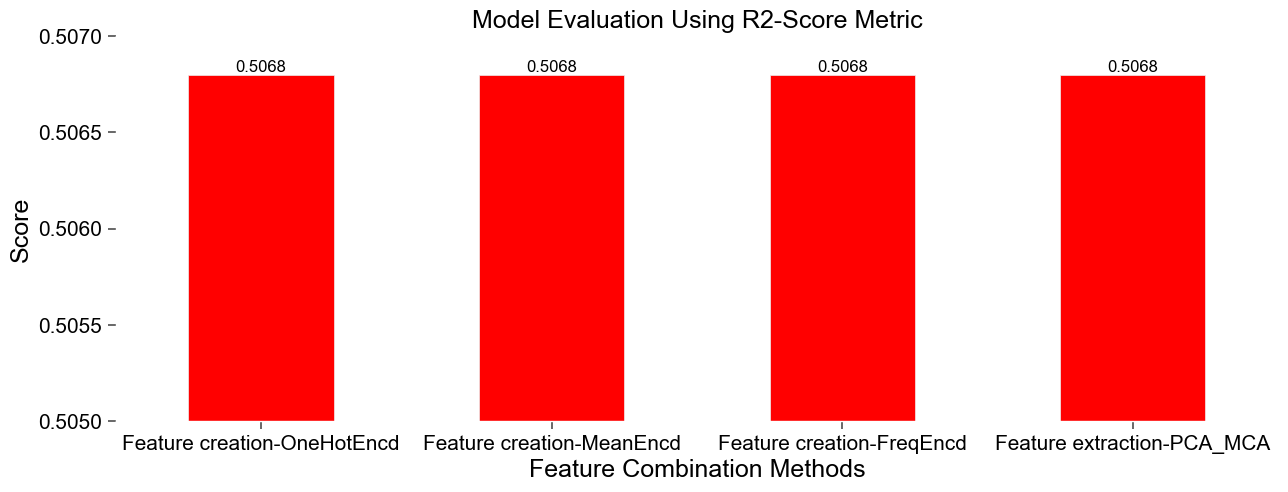

In [133]:
index = ['Feature creation-OneHotEncd', 'Feature creation-MeanEncd', 'Feature creation-FreqEncd', 'Feature extraction-PCA_MCA']
R2_Score = [0.5068, 0.5068, 0.5068, 0.5068]


score_df = pd.DataFrame({'R2_Score': R2_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['red'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, R2_Score)

plt.xlabel('Feature Combination Methods', fontsize = 18, color= 'black')
plt.ylabel('Score', fontsize = 18, color= 'black')
plt.title('Model Evaluation Using R2-Score Metric', fontsize = 18, color= 'black')
plt.ylim([0.505, 0.507])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

#### 5.1.2.2: Feature Combination Comparism of Mean Squared Error (MSE) Metric

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Feature creation-OneHotEncd'),
  Text(1, 0, 'Feature creation-MeanEncd'),
  Text(2, 0, 'Feature creation-FreqEncd'),
  Text(3, 0, 'Feature extraction-PCA_MCA')])

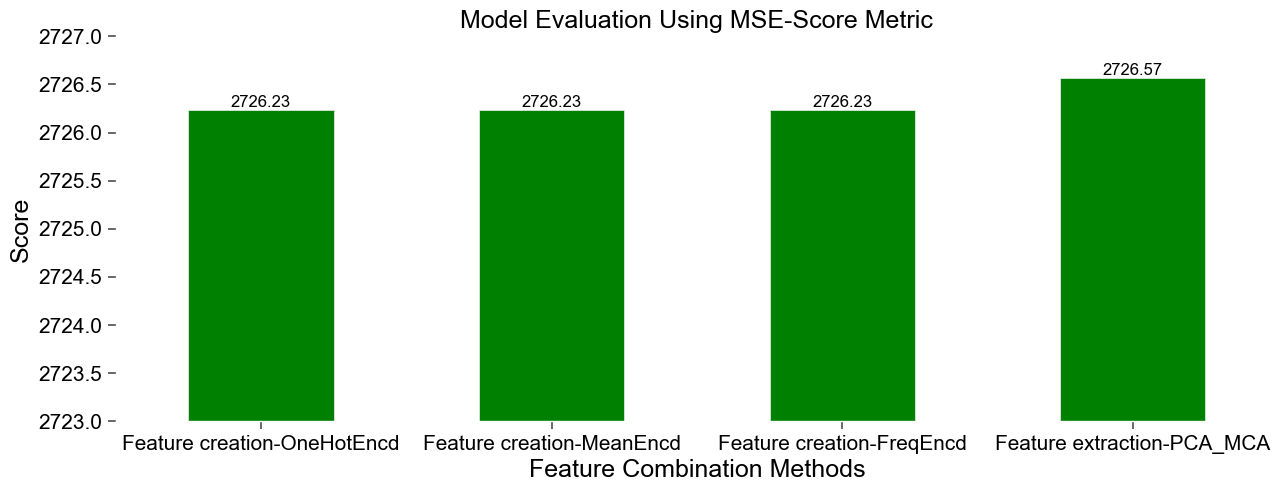

In [134]:
index = ['Feature creation-OneHotEncd', 'Feature creation-MeanEncd', 'Feature creation-FreqEncd', 'Feature extraction-PCA_MCA']
MSE_Score = [2726.23, 2726.23, 2726.23, 2726.57]


score_df = pd.DataFrame({'MSE_Score': MSE_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['green'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, MSE_Score)

plt.xlabel('Feature Combination Methods', fontsize = 18, color= 'black')
plt.ylabel('Score', fontsize = 18, color= 'black')
plt.title('Model Evaluation Using MSE-Score Metric', fontsize = 18, color= 'black')
plt.ylim([2723, 2727])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

#### 5.1.2.3: Feature Combination Comparism of Mean Absolute Error (MAE) Metric

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Feature creation-OneHotEncd'),
  Text(1, 0, 'Feature creation-MeanEncd'),
  Text(2, 0, 'Feature creation-FreqEncd'),
  Text(3, 0, 'Feature extraction-PCA_MCA')])

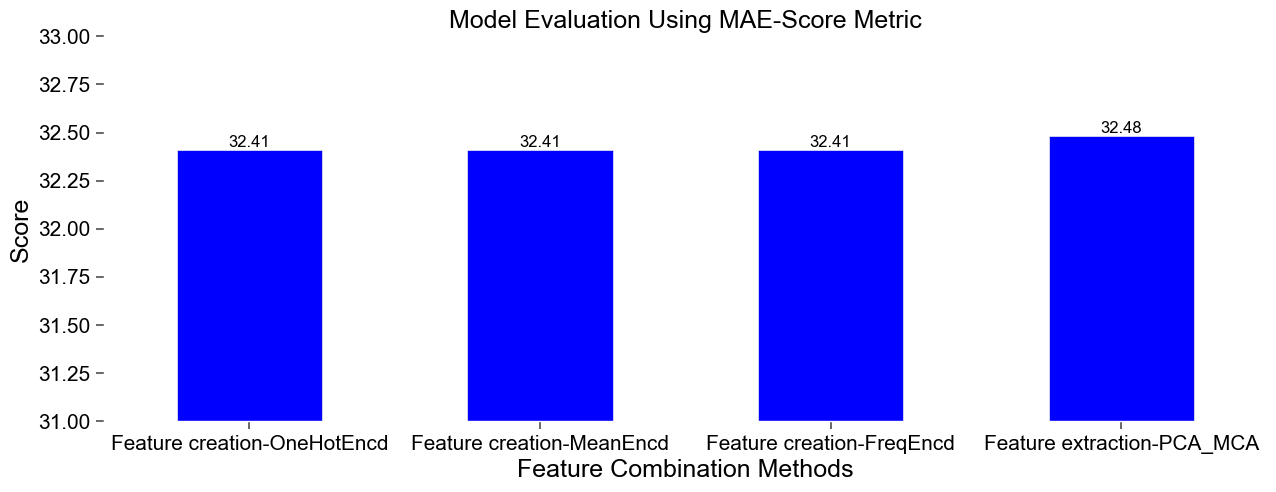

In [135]:
index = ['Feature creation-OneHotEncd', 'Feature creation-MeanEncd', 'Feature creation-FreqEncd', 'Feature extraction-PCA_MCA']
MAE_Score = [32.41, 32.41, 32.41, 32.48]


score_df = pd.DataFrame({'MAE_Score': MAE_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['blue'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, MAE_Score)

plt.xlabel('Feature Combination Methods', fontsize = 18, color= 'black')
plt.ylabel('Score', fontsize = 18, color= 'black')
plt.title('Model Evaluation Using MAE-Score Metric', fontsize = 18, color= 'black')
plt.ylim([31, 33])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

#### 5.1.2.4: Feature Combination Comparism of Mean Absolute Percentage Error (MAPE) Metric

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Feature creation-OneHotEncd'),
  Text(1, 0, 'Feature creation-MeanEncd'),
  Text(2, 0, 'Feature creation-FreqEncd'),
  Text(3, 0, 'Feature extraction-PCA_MCA')])

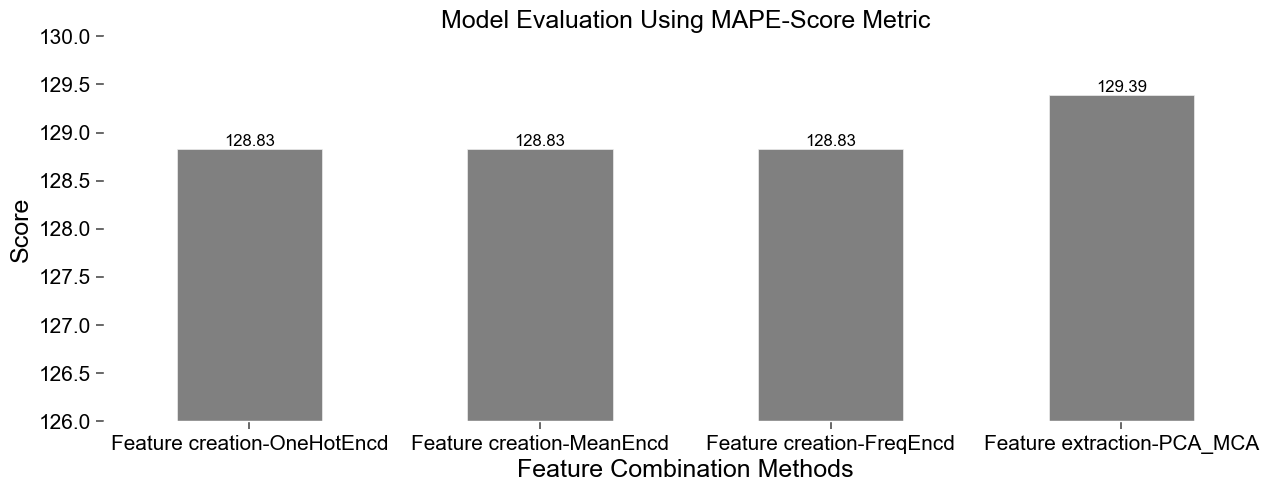

In [136]:
index = ['Feature creation-OneHotEncd', 'Feature creation-MeanEncd', 'Feature creation-FreqEncd', 'Feature extraction-PCA_MCA']
MAPE_Score = [128.83, 128.83, 128.83, 129.39]


score_df = pd.DataFrame({'MAPE_Score': MAPE_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['grey'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, MAPE_Score)

plt.xlabel('Feature Combination Methods', fontsize = 18, color= 'black')
plt.ylabel('Score', fontsize = 18, color= 'black')
plt.title('Model Evaluation Using MAPE-Score Metric', fontsize = 18, color= 'black')
plt.ylim([126, 130])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

**Comment**

Using the Linear Regression as the baseline model, the feature creation techniques had very similiar performance and performed a little bit above the Feature Extraction technique (Prinicipal Component Analysis and Multiple Correspondence Analysis). However, when a more robust model was utilised, the feature creation technique yielded significantly better result. Additionaly the feature extraction tecnique's ability to retain more information (i.e. Torque) and resolve the multicollinearity problem resulted to its selection for further analysis.

### 5.1.3: KNN Regression Model

MSE: 1356.2086277453734
R2: 0.754677949715377
MAPE: 34.0113309531412
MAE: 15.78867039586919


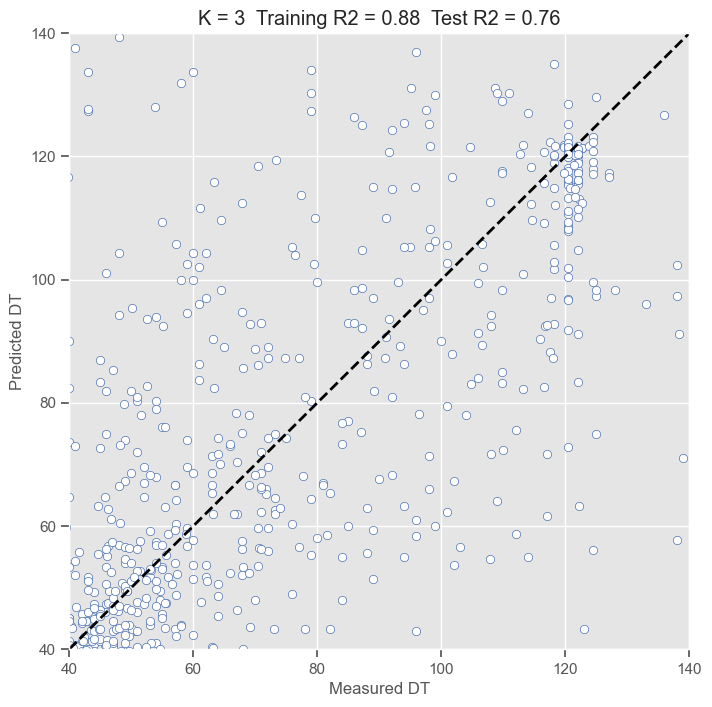

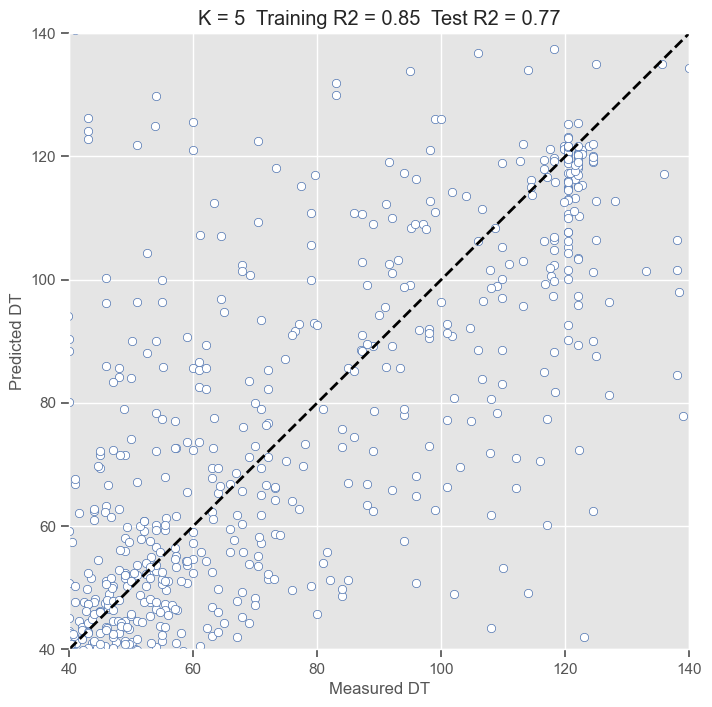

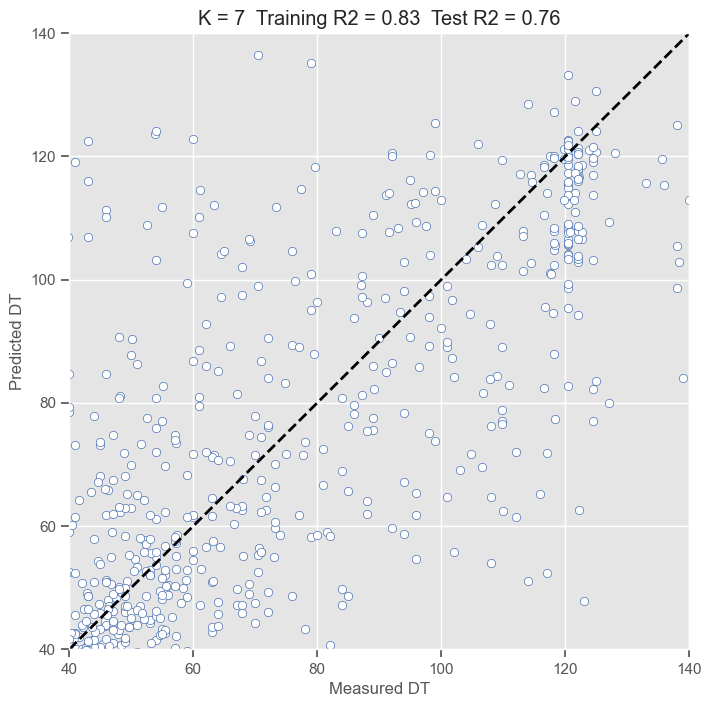

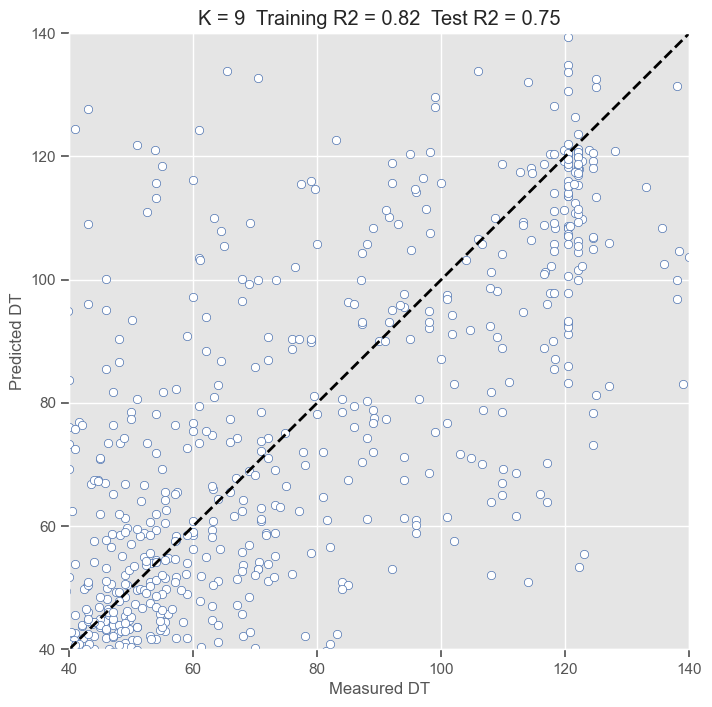

In [95]:
from sklearn import neighbors

MSE = []      # To store MSE values for different k
k   = []      # To store values of K
R2  = []      # To store R2

for K in range(3, 10, 2):
    k.append(K)
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_trainPCA, y_trainPCA)  # Fit the model to the training dataset
    training_R2 = knn.score(X_trainPCA, y_trainPCA) # Compute training R2
    
    
    y_pred = knn.predict(X_validPCA)  # Make prediction using test NPHI, GR, RHOB
    test_R2 = knn.score(X_validPCA, y_validPCA)       # Compute test R2
    R2.append(test_R2)
    
    error = mean_squared_error(y_validPCA, y_pred) # Calculate MSE
    MSE.append(error)                          # Store MSE values for different K
    residual = (y_validPCA - y_pred)  
   
    # Also create a series of plots for predicted versus actual DT for different values of K
    fig = plt.figure(figsize=(8, 8))
    plt.axis([40, 140, 40, 140])
    plt.scatter(y_validPCA, y_pred, c = 'w', edgecolor = 'b')
    plt.plot([40, 140],[40, 140], color='black', linewidth=2, linestyle='--')
    plt.ylabel('Predicted DT') 
    plt.xlabel('Measured DT') 
    plt.title('K = %s  Training R2 = %.2f  Test R2 = %.2f'%(K, training_R2, test_R2))
    
print("MSE:", mean_squared_error(y_validPCA,y_pred))
print("R2:", r2_score(y_validPCA,y_pred))
print("MAPE:", MAPE(y_validPCA,y_pred))
print("MAE:", mean_absolute_error(y_validPCA,y_pred))

#### 5.1.3.1: Plot of MSE values to determine optimum K

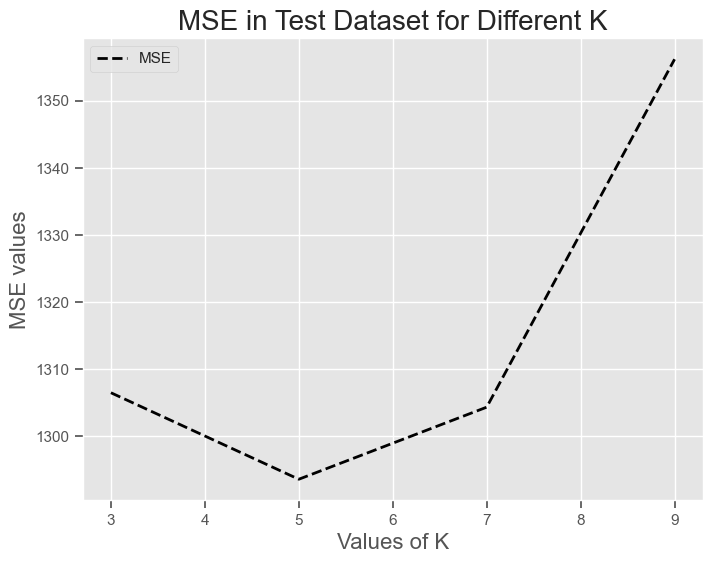

In [96]:
#plotting the rmse values against k values
fig = plt.figure(K, figsize=(8, 6))
plt.plot(k, MSE, label = 'MSE', color='black', linewidth=2, linestyle='--')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('MSE values', fontsize = 16)
plt.title ('MSE in Test Dataset for Different K', fontsize = 20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.legend()

#### 5.1.3.2: Plot of R2 values to determine optimum K

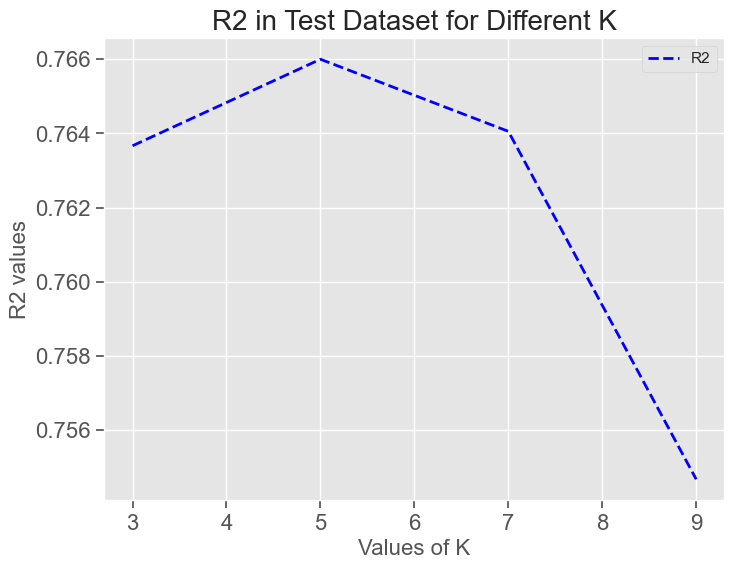

In [97]:
#plotting the rmse values against k values
fig = plt.figure(K, figsize=(8, 6))
plt.plot(k, R2, label = 'R2', color='blue', linewidth=2, linestyle='--')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('R2 values', fontsize = 16)
plt.title ('R2 in Test Dataset for Different K', fontsize = 20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.legend()

**Comment**

From the above metrics plots, it can be concluded that the KNN model perform best when K = 5

In [98]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_trainPCA, y_trainPCA)
y_pred = knn.predict(X_validPCA)

print("MSE:", mean_squared_error(y_validPCA,y_pred))
print("R2:", r2_score(y_validPCA,y_pred))
print("MAPE:", MAPE(y_validPCA,y_pred))
print("MAE:", mean_absolute_error(y_validPCA,y_pred))

rmse = np.sqrt(mean_squared_error(y_validPCA, y_pred))
print("RMSE: %f" % (rmse))

MSE: 1293.6185477022377
R2: 0.7659997526073017
MAPE: 32.28442757071842
MAE: 15.39380808950086
RMSE: 35.966909


**Comment**

From the above statistical metrics, the KNN model performed better than the Linear regression model.

### 5.1.4: RandomForest (RF) Model

MSE: 1205.1505471484222
R2: 0.782002564296034
MAPE: 34.367307312311745
MAE: 15.810438812392425
RMSE: 34.715278


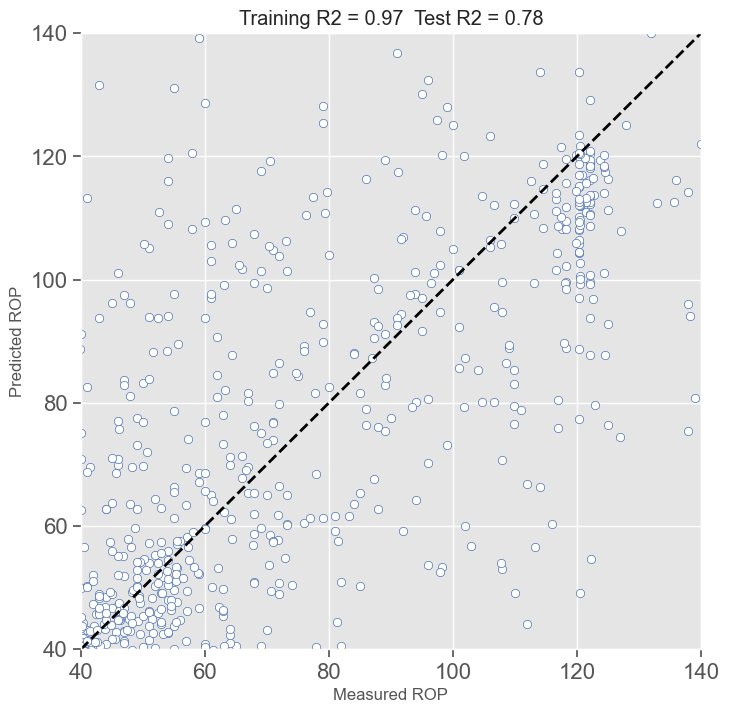

In [99]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_trainPCA,y_trainPCA)
y_pred_rf = rfr.predict(X_validPCA)

training_R2_rf = rfr.score(X_trainPCA, y_trainPCA) # Compute training R2

test_R2_rf = rfr.score(X_validPCA, y_validPCA)       # Compute test R2
    
error = mean_squared_error(y_validPCA, y_pred_rf) # Calculate MSE
residual = (y_validPCA - y_pred_rf)  
   
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([40, 140, 40, 140])
plt.scatter(y_validPCA, y_pred_rf, c = 'w', edgecolor = 'b')
plt.plot([40, 140],[40, 140], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted ROP') 
plt.xlabel('Measured ROP') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2_rf, test_R2_rf))

print("MSE:", mean_squared_error(y_validPCA,y_pred_rf))
print("R2:", r2_score(y_validPCA,y_pred_rf))
print("MAPE:", MAPE(y_validPCA,y_pred_rf))
print("MAE:", mean_absolute_error(y_validPCA,y_pred_rf))

rmse = np.sqrt(mean_squared_error(y_validPCA, y_pred_rf))
print("RMSE: %f" % (rmse))

### 5.1.5: Support Vector Machine (SVM) Model

MSE: 2390.168473300778
R2: 0.567646880870675
MAPE: 50.58049519895117
MAE: 21.232482942320466
RMSE: 48.889349


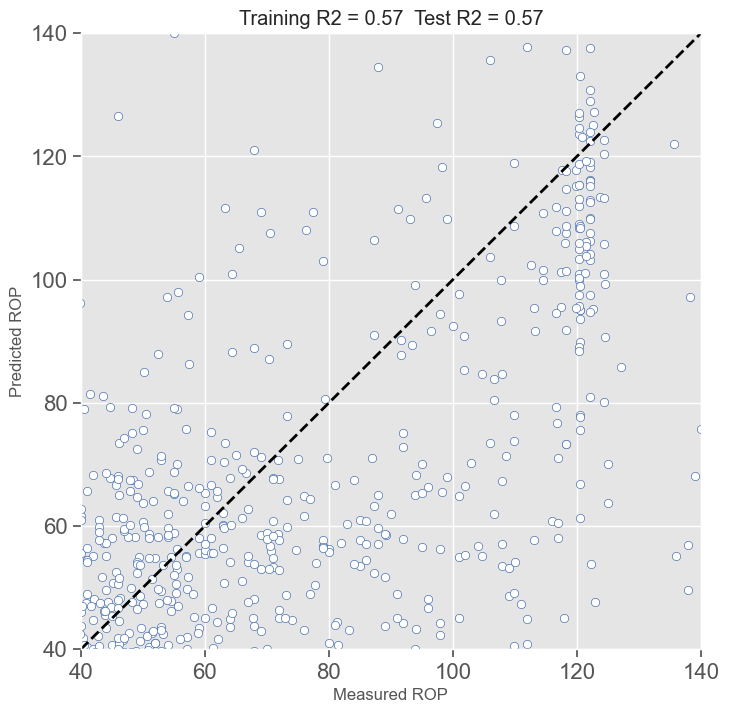

In [100]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create an instance of the SVM regression model with specified hyperparameters
svm_regressor = SVR(kernel='rbf')

# Fit the SVM regression model to the training data
svm_regressor.fit(X_trainPCA, y_trainPCA)

# Use the trained SVM regression model to make predictions on the test data
y_pred_svm = svm_regressor.predict(X_validPCA)

training_R2 = svm_regressor.score(X_trainPCA, y_trainPCA) # Compute training R2

test_R2 = svm_regressor.score(X_validPCA, y_validPCA)       # Compute test R2
    
error = mean_squared_error(y_validPCA, y_pred_svm) # Calculate MSE
residual = (y_validPCA - y_pred_svm)  
   
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([40, 140, 40, 140])
plt.scatter(y_validPCA, y_pred_svm, c = 'w', edgecolor = 'b')
plt.plot([40, 140],[40, 140], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted ROP') 
plt.xlabel('Measured ROP') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

# Print the mean squared error
print("MSE:", mean_squared_error(y_validPCA,y_pred_svm))
print("R2:", r2_score(y_validPCA,y_pred_svm))
print("MAPE:", MAPE(y_validPCA,y_pred_svm))
print("MAE:", mean_absolute_error(y_validPCA,y_pred_svm))

rmse = np.sqrt(mean_squared_error(y_validPCA, y_pred_svm))
print("RMSE: %f" % (rmse))

**Comment**

The Support vector machine model performed poorly as compared to other models.
Possible reasons
Large datasets: SVM does not do well on Large datasets.

Reference: https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0

### 5.1.6: Extreme Gradient Boost Model

The Extreme Gradient Boost (XGBoost) algorithm combine multiple weak models to create a strong model that can make accurate predictions. The algorithm calculates the gradient of the loss function with respect to the predictions made by the previous tree. The algorithm works in the following steps:

1. Initialize the model with a single decision tree.

2. Fit the tree to the training data and use it to make predictions on the training set.

3. Calculate the errors between the predicted values and the actual values.

4. Use the errors to train a new decision tree that can correct the errors made by the previous tree.

5. Add the new decision tree to the ensemble and update the model.

6. Repeat steps 2-5 until the model reaches a specified number of trees or the error is minimized.

7. Use the ensemble of decision trees to make predictions on new data.

The key feature of XGBoost that makes it powerful is that it uses a gradient boosting approach to build decision trees. This means that the algorithm calculates the gradient of the loss function with respect to the predictions made by the previous tree. The new tree is then built to minimize the residual errors from the previous tree, weighted by the gradient.
XGBoost also incorporates several other techniques to improve the performance of the algorithm, such as regularization to prevent overfitting and parallel processing to speed up computation.

MSE: 1316.0080320660306
R2: 0.7619497605215911
MAPE: 41.52329799791966
MAE: 17.387040899679604
RMSE: 36.276825


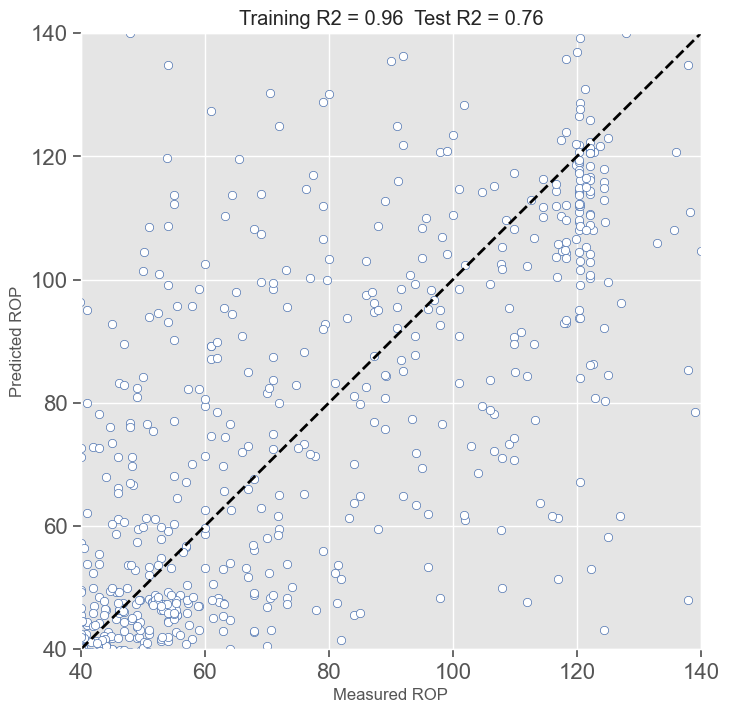

In [101]:
import xgboost as xgb

# Define the XGBoost regressor and fit the model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xg_reg.fit(X_trainPCA, y_trainPCA)

# Predict the target variable for the test set and calculate the root mean squared error (RMSE)
y_pred_xgb = xg_reg.predict(X_validPCA)

training_R2 = xg_reg.score(X_trainPCA, y_trainPCA) # Compute training R2

test_R2 = xg_reg.score(X_validPCA, y_validPCA)       # Compute test R2
    
error = mean_squared_error(y_validPCA, y_pred_xgb) # Calculate MSE
residual = (y_validPCA - y_pred_xgb)  
   
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([40, 140, 40, 140])
plt.scatter(y_validPCA, y_pred_xgb, c = 'w', edgecolor = 'b')
plt.plot([40, 140],[40, 140], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted ROP') 
plt.xlabel('Measured ROP') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

# Print the mean squared error
print("MSE:", mean_squared_error(y_validPCA,y_pred_xgb))
print("R2:", r2_score(y_validPCA,y_pred_xgb))
print("MAPE:", MAPE(y_validPCA,y_pred_xgb))
print("MAE:", mean_absolute_error(y_validPCA,y_pred_xgb))

rmse = np.sqrt(mean_squared_error(y_validPCA, y_pred_xgb))
print("RMSE: %f" % (rmse))

## 5.2: Deep Learning Models

### 5.2.1: Multilayer Perceptron (MLP) Model

MSE: 1760.299129534166
R2: 0.6815827721952554
MAPE: 53.956839258020075
MAE: 19.992160605351103
RMSE: 41.955919


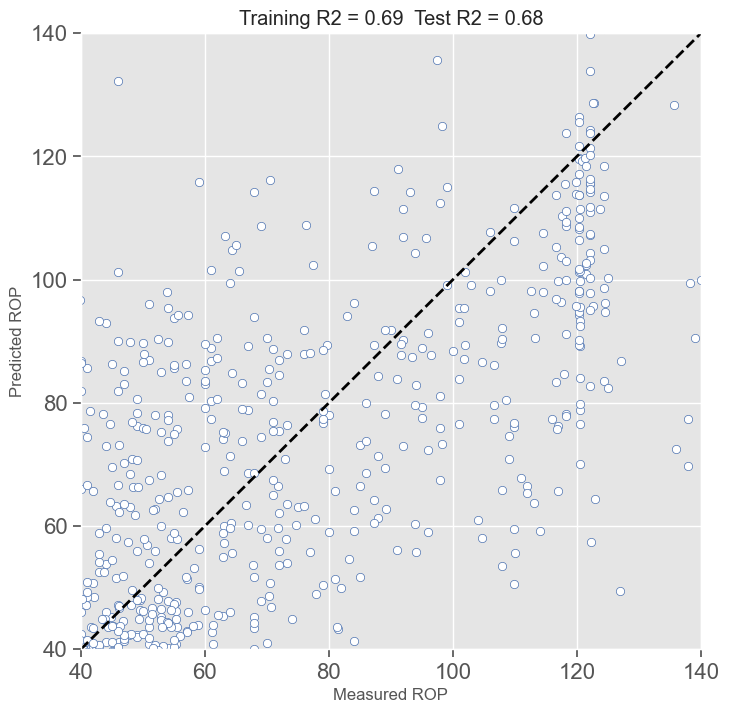

In [102]:
from sklearn.neural_network import MLPRegressor

# Define the MLP regressor model and set hyperparameters
mlp = MLPRegressor(random_state=42)

# Train the MLP regressor model
mlp.fit(X_trainPCA, y_trainPCA)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_validPCA)

training_R2 = mlp.score(X_trainPCA, y_trainPCA) # Compute training R2

test_R2 = mlp.score(X_validPCA, y_validPCA)       # Compute test R2
    
error = mean_squared_error(y_validPCA, y_pred_mlp) # Calculate MSE
residual = (y_validPCA - y_pred_mlp)  
   
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([40, 140, 40, 140])
plt.scatter(y_validPCA, y_pred_mlp, c = 'w', edgecolor = 'b')
plt.plot([40, 140],[40, 140], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted ROP') 
plt.xlabel('Measured ROP') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

# Print the mean squared error
print("MSE:", mean_squared_error(y_validPCA,y_pred_mlp))
print("R2:", r2_score(y_validPCA,y_pred_mlp))
print("MAPE:", MAPE(y_validPCA,y_pred_mlp))
print("MAE:", mean_absolute_error(y_validPCA,y_pred_mlp))

rmse = np.sqrt(mean_squared_error(y_validPCA, y_pred_mlp))
print("RMSE: %f" % (rmse))

### 5.2.2: Vanilla Neural Network (VNN) Model

The Vanilla Neural Networks have the ability to handle structured data only. The hidden layer consists of n number of neurons. Each layer will be having an Activation Function associated with each of the neurons. The activation function is the function that is responsible for introducing non-linearity in the relationship. In our case, the output layer must contain a linear activation function. The purpose of using Artificial Neural Networks for Regression over Linear Regression is that the linear regression can only learn the linear relationship between the features and target and therefore cannot learn the complex non-linear relationship.

Epoch 1/10
117/117 [==============================] - 1s 4ms/step - loss: 0.6247 - mean_squared_logarithmic_error: 0.6230 - val_loss: 0.2467 - val_mean_squared_logarithmic_error: 0.2400
Epoch 2/10
117/117 [==============================] - 0s 3ms/step - loss: 0.2384 - mean_squared_logarithmic_error: 0.2374 - val_loss: 0.2430 - val_mean_squared_logarithmic_error: 0.2378
Epoch 3/10
117/117 [==============================] - 0s 3ms/step - loss: 0.2258 - mean_squared_logarithmic_error: 0.2254 - val_loss: 0.2404 - val_mean_squared_logarithmic_error: 0.2343
Epoch 4/10
117/117 [==============================] - 0s 3ms/step - loss: 0.2160 - mean_squared_logarithmic_error: 0.2156 - val_loss: 0.2300 - val_mean_squared_logarithmic_error: 0.2243
Epoch 5/10
117/117 [==============================] - 0s 4ms/step - loss: 0.2142 - mean_squared_logarithmic_error: 0.2138 - val_loss: 0.2231 - val_mean_squared_logarithmic_error: 0.2195
Epoch 6/10
117/117 [==============================] - 0s 3ms/step - lo

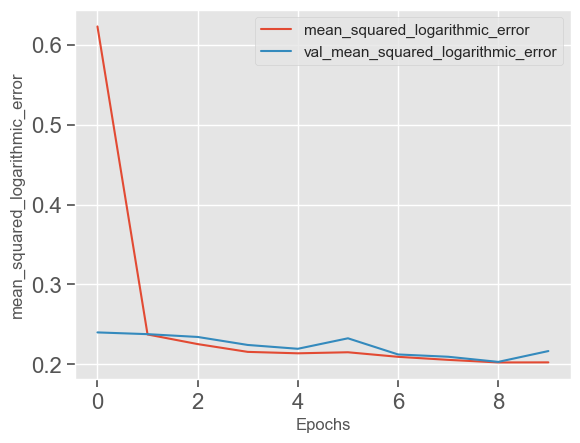

73/73 [==============================] - 0s 931us/step
R2 Score: 0.6492627218764575


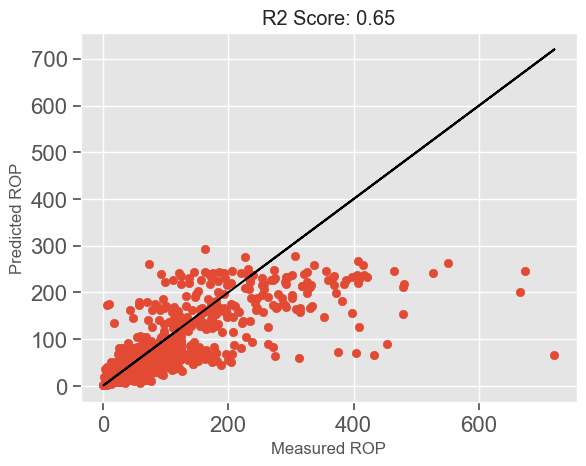

MSE: 1938.9733703562345
R2: 0.6492627218764575
MAPE: 189.29107116246163
MAE: 19.59798706216882
RMSE: 44.033775


In [103]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_trainPCA.values, 
    y_trainPCA.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

# Calculate R2 score
y_pred_vnn = model.predict(X_validPCA.values)
r2 = r2_score(y_validPCA, y_pred_vnn)
print('R2 Score:', r2)

# Plot the R2 score
plt.scatter(y_validPCA, y_pred_vnn)
plt.plot(y_validPCA, y_validPCA, color='black')
plt.xlabel('Measured ROP')
plt.ylabel('Predicted ROP')
plt.title('R2 Score: {:.2f}'.format(r2))
plt.show()

# Print the mean squared error
print("MSE:", mean_squared_error(y_validPCA,y_pred_vnn))
print("R2:", r2_score(y_validPCA,y_pred_vnn))
print("MAPE:", MAPE(y_validPCA,y_pred_vnn))
print("MAE:", mean_absolute_error(y_validPCA,y_pred_vnn))

rmse = np.sqrt(mean_squared_error(y_validPCA, y_pred_vnn))
print("RMSE: %f" % (rmse))

## 5.3: Models Comparison using Statistical Metrics

In [104]:
def data_point(x,y):
    for i in range(min(len(x), len(y))):
        plt.text(i, y[i], y[i], ha = 'center', va = 'bottom', size = 'large', color='black')

### 5.3.1: Comparison of Machine Learning Models and Deep Learning Models based on Training Coefficient of Determination (R2-Score) Metric

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'XGBoost'),
  Text(4, 0, 'MLP'),
  Text(5, 0, 'VNN')])

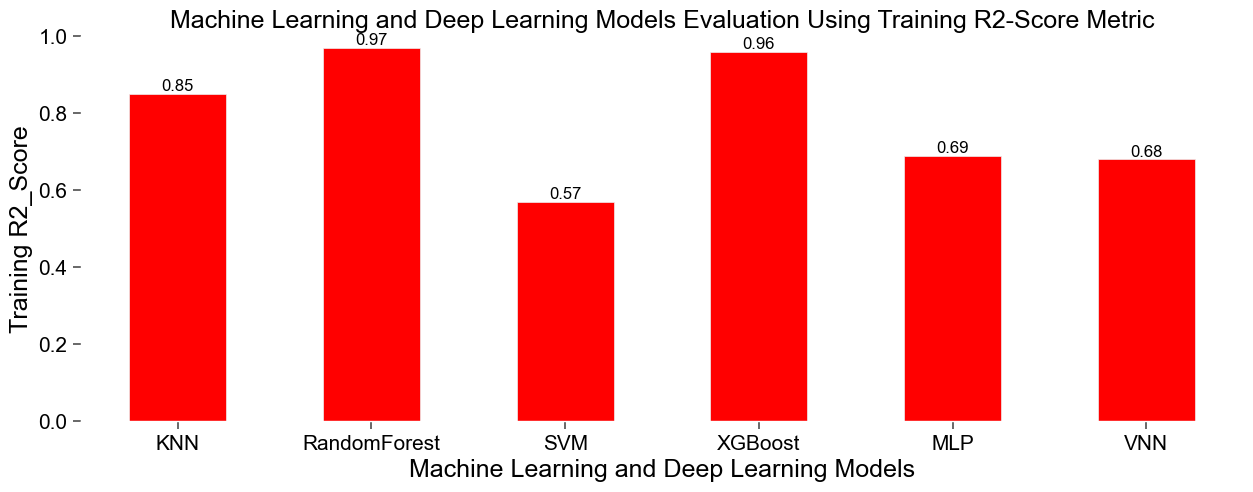

In [105]:
index = ['KNN', 'RandomForest', 'SVM', 'XGBoost', 'MLP', 'VNN']
Training_R2_Score = [0.85, 0.97, 0.57, 0.96, 0.69, 0.68]


score_df = pd.DataFrame({'Training_R2_Score': Training_R2_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['red'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, Training_R2_Score)

plt.xlabel('Machine Learning and Deep Learning Models', fontsize = 18, color= 'black')
plt.ylabel('Training R2_Score', fontsize = 18, color= 'black')
plt.title('Machine Learning and Deep Learning Models Evaluation Using Training R2-Score Metric', fontsize = 18, color= 'black')
plt.ylim([0.0, 1.00])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

### 5.3.2: Comparison of Machine Learning Models and Deep Learning Models based on Test Coefficient of Determination (R2-Score) Metric

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'XGBoost'),
  Text(4, 0, 'MLP'),
  Text(5, 0, 'VNN')])

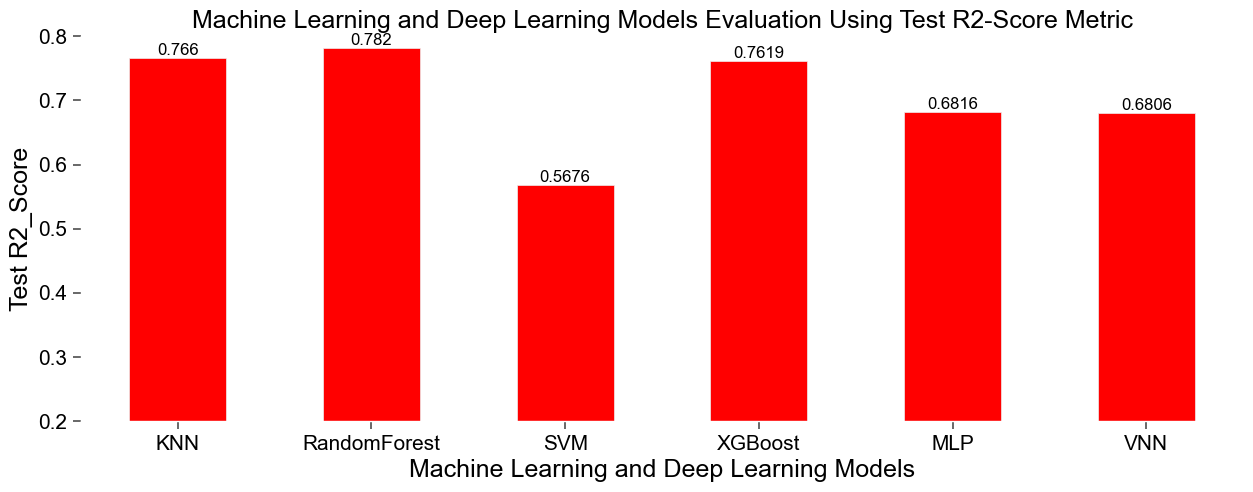

In [106]:
index = ['KNN', 'RandomForest', 'SVM', 'XGBoost', 'MLP', 'VNN']
Test_R2_Score = [0.7660, 0.7820, 0.5676, 0.7619, 0.6816, 0.6806]


score_df = pd.DataFrame({'Test_R2_Score': Test_R2_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['red'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, Test_R2_Score)

plt.xlabel('Machine Learning and Deep Learning Models', fontsize = 18, color= 'black')
plt.ylabel('Test R2_Score', fontsize = 18, color= 'black')
plt.title('Machine Learning and Deep Learning Models Evaluation Using Test R2-Score Metric', fontsize = 18, color= 'black')
plt.ylim([0.2, 0.80])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

### 5.3.3: Comparison of Machine Learning Models and Deep Learning Models based on Mean Squared Error (MSE) Metric

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'XGBoost'),
  Text(4, 0, 'MLP'),
  Text(5, 0, 'VNN')])

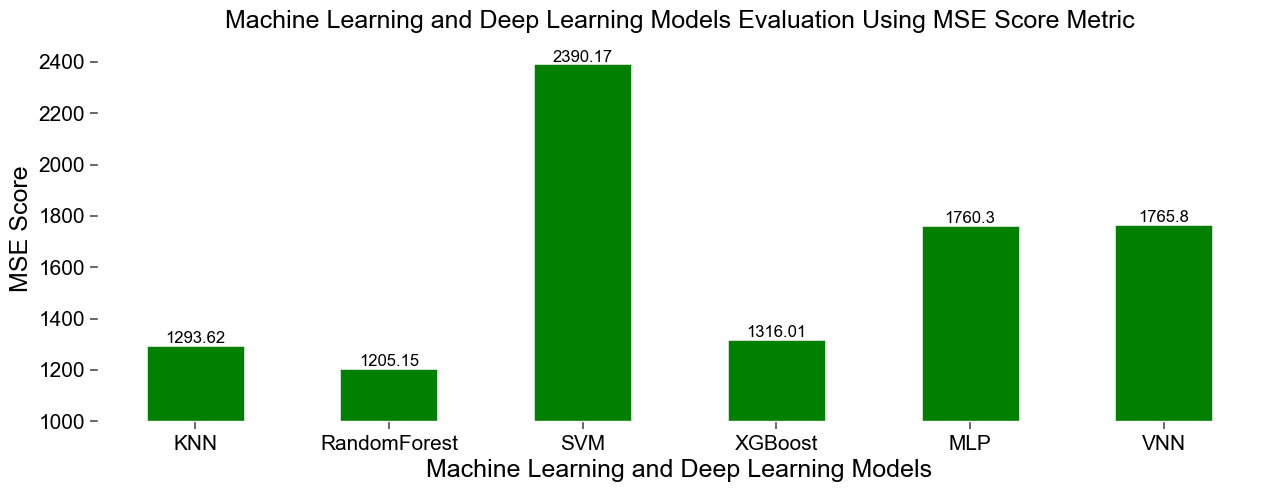

In [107]:
index = ['KNN', 'RandomForest', 'SVM', 'XGBoost', 'MLP', 'VNN']
MSE_Score = [1293.62, 1205.15, 2390.17, 1316.01, 1760.30, 1765.8]


score_df = pd.DataFrame({'MSE_Score': MSE_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['green'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, MSE_Score)

plt.xlabel('Machine Learning and Deep Learning Models', fontsize = 18, color= 'black')
plt.ylabel('MSE Score', fontsize = 18, color= 'black')
plt.title('Machine Learning and Deep Learning Models Evaluation Using MSE Score Metric', fontsize = 18, color= 'black')
plt.ylim([1000, 2500])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

### 5.3.4: Comparison of Machine Learning Models and Deep Learning Models based on Mean Absolute Percentage Error (MAPE) Metric

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'XGBoost'),
  Text(4, 0, 'MLP'),
  Text(5, 0, 'VNN')])

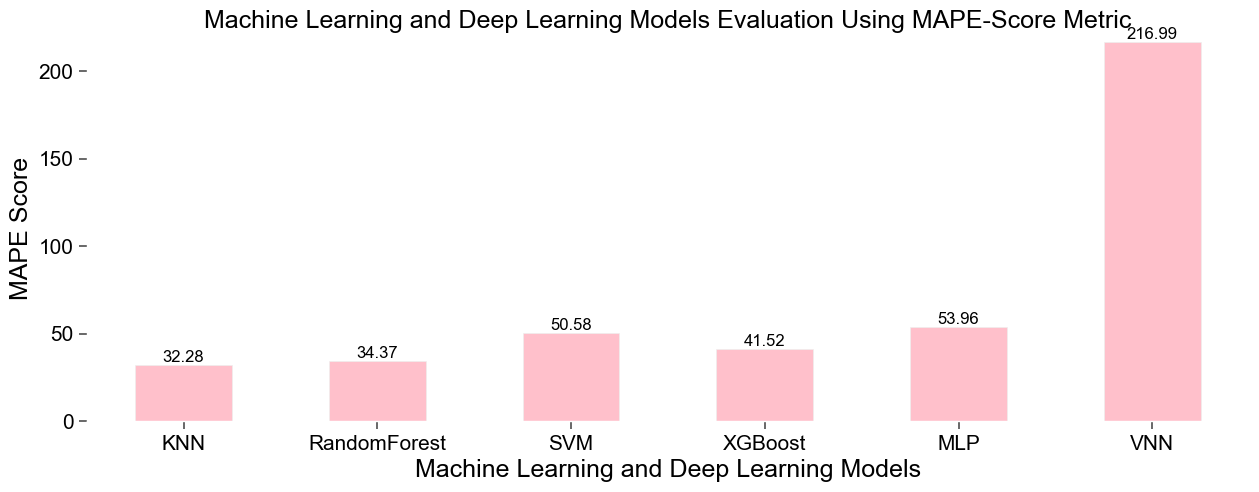

In [108]:
index = ['KNN', 'RandomForest', 'SVM', 'XGBoost', 'MLP', 'VNN']
MAPE_Score = [32.28,  34.37, 50.58, 41.52, 53.96, 216.99]


score_df = pd.DataFrame({'MAPE_Score': MAPE_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['pink'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, MAPE_Score)

plt.xlabel('Machine Learning and Deep Learning Models', fontsize = 18, color= 'black')
plt.ylabel('MAPE Score', fontsize = 18, color= 'black')
plt.title('Machine Learning and Deep Learning Models Evaluation Using MAPE-Score Metric', fontsize = 18, color= 'black')
plt.ylim([0, 220])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

### 5.3.5: Comparison of Machine Learning Models and Deep Learning Models based on Mean Absolute Error (MAE) Metric

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'XGBoost'),
  Text(4, 0, 'MLP'),
  Text(5, 0, 'VNN')])

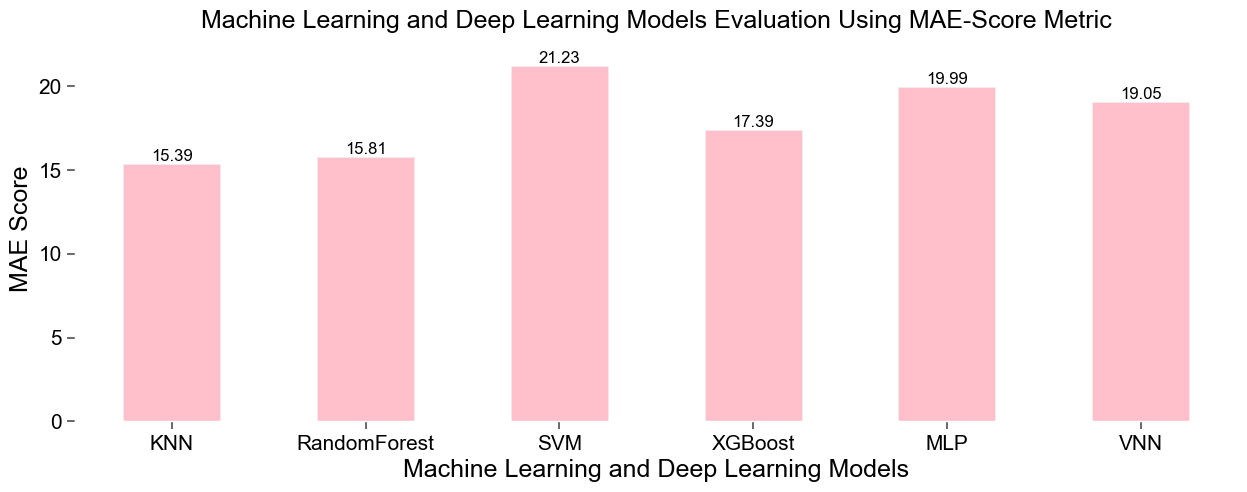

In [109]:
index = ['KNN', 'RandomForest', 'SVM', 'XGBoost', 'MLP', 'VNN']
MAE_Score = [15.39,  15.81, 21.23, 17.39, 19.99, 19.05]


score_df = pd.DataFrame({'MAE_Score': MAE_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['pink'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, MAE_Score)

plt.xlabel('Machine Learning and Deep Learning Models', fontsize = 18, color= 'black')
plt.ylabel('MAE Score', fontsize = 18, color= 'black')
plt.title('Machine Learning and Deep Learning Models Evaluation Using MAE-Score Metric', fontsize = 18, color= 'black')
plt.ylim([0, 23])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

### 5.3.6: Comparison of Machine Learning Models and Deep Learning Models based on Root Mean Square Error (RMSE) Metric

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'XGBoost'),
  Text(4, 0, 'MLP'),
  Text(5, 0, 'VNN')])

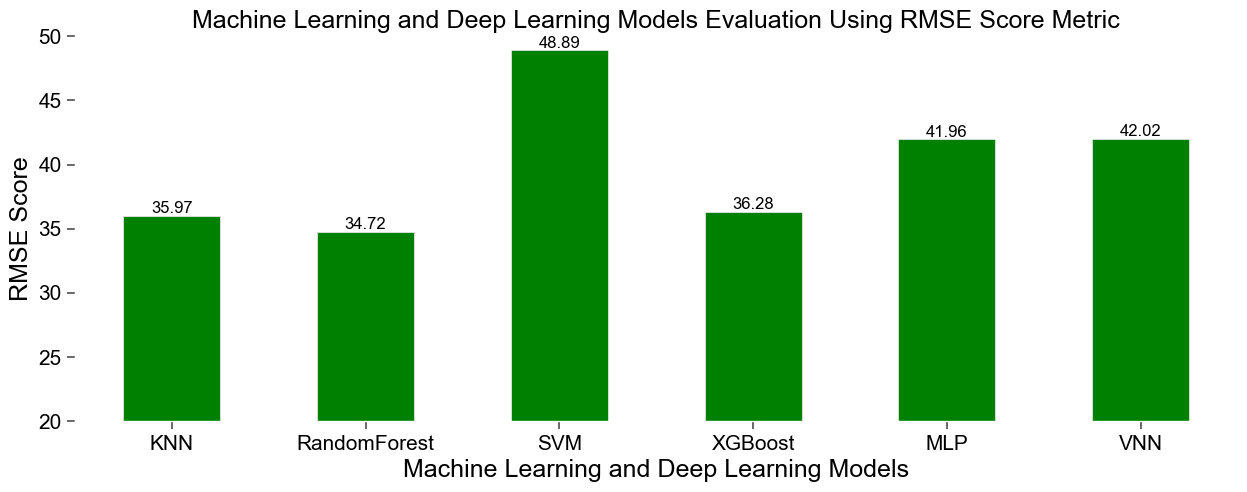

In [110]:
index = ['KNN', 'RandomForest', 'SVM', 'XGBoost', 'MLP', 'VNN']
RMSE_Score = [35.97, 34.72, 48.89, 36.28, 41.96, 42.02]


score_df = pd.DataFrame({'RMSE_Score': RMSE_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['green'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, RMSE_Score)

plt.xlabel('Machine Learning and Deep Learning Models', fontsize = 18, color= 'black')
plt.ylabel('RMSE Score', fontsize = 18, color= 'black')
plt.title('Machine Learning and Deep Learning Models Evaluation Using RMSE Score Metric', fontsize = 18, color= 'black')
plt.ylim([20, 50])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

# 6. Optimization 

Reference to optimization codes below: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms 

### 6.1: Hyperparameters Tuning and Cross Validation for KNN Model (GridSearchCV)

In [126]:
%%time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the KNN regressor
knn = KNeighborsRegressor()

# Define the hyperparameters to search over
param_grid_knn = {'n_neighbors': range(1,20),
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['brute', 'kd_tree', 'ball_tree'], 
                  'leaf_size': list(range(10, 51, 10)),
                  'p': [1, 2, 3]}

# Use GridSearchCV to find the best hyperparameters
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=10, n_jobs=-1)

# Fit the model to the data
grid_search_knn.fit(X_trainPCA, y_trainPCA)

# Get the best hyperparameters and the corresponding score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search_knn.best_params_)

cv_res = pd.DataFrame(grid_search_knn.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]


Best hyperparameters:  {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 12, 'p': 3, 'weights': 'distance'}
Wall time: 17min 26s


params  split0_test_score  \
185  {'algorithm': 'brute', 'leaf_size': 20, 'n_nei...           0.812264   
71   {'algorithm': 'brute', 'leaf_size': 10, 'n_nei...           0.812264   
527  {'algorithm': 'brute', 'leaf_size': 50, 'n_nei...           0.812264   
413  {'algorithm': 'brute', 'leaf_size': 40, 'n_nei...           0.812264   
299  {'algorithm': 'brute', 'leaf_size': 30, 'n_nei...           0.812264   
..                                                 ...                ...   
343  {'algorithm': 'brute', 'leaf_size': 40, 'n_nei...           0.728535   
115  {'algorithm': 'brute', 'leaf_size': 20, 'n_nei...           0.728535   
571  {'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...           0.728535   
570  {'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...           0.728535   
0    {'algorithm': 'brute', 'leaf_size': 10, 'n_nei...           0.728535   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
185           0.753816           0.822531         0.775537        0.030609   
71            0.753816           0.822531         0.775537        0.030609   
527           0.753816           0.822531         0.775537        0.030609   
413           0.753816           0.822531         0.775537        0.030609   
299           0.753816           0.822531         0.775537        0.030609   
..                 ...                ...              ...             ...   
343           0.579714           0.625436         0.635591        0.051242   
115           0.579714           0.625436         0.635591        0.051242   
571           0.579714           0.625436         0.635591        0.051242   
570           0.579714           0.625436         0.635591        0.051242   
0             0.579714           0.625436         0.635591        0.051242   

     rank_test_score  
185                1  
71                 1  
527                1  
413                1  
299                1  
..               ...  
343             1681  
115             1681  
571             1681  
570             1681  
0               1681  

[1710 rows x 7 columns]

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using KNN (GridSearchCV) with an optimal set of parameters')

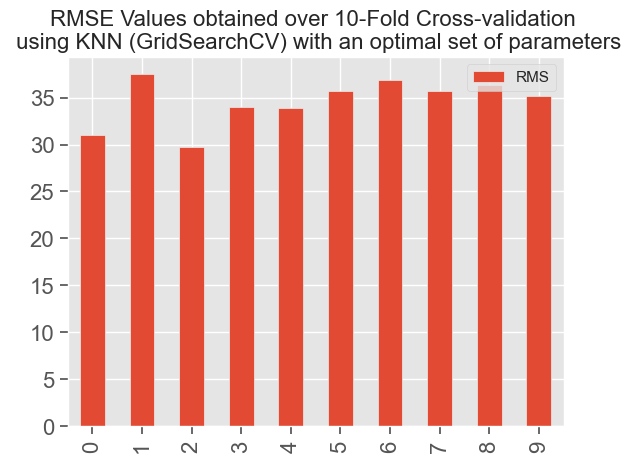

In [127]:
from sklearn.model_selection import cross_val_score

# Use the optimal hyperparameters for the KNN model and check model performance across all folds
knn = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 12, p = 3, weights = 'distance', leaf_size = 10)
rmse_knn = -cross_val_score(knn, X_trainPCA, y_trainPCA, scoring="neg_root_mean_squared_error", cv=10)
df_rf_rmses_knn = pd.DataFrame(rmse_knn, columns = ['RMS'])
df_rf_rmses_knn.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using KNN (GridSearchCV) with an optimal set of parameters', fontsize = 16)

Wall time: 27.3 s


Text(0.5, 1.0, 'Training R2 = 1.00  Test R2 = 0.77')

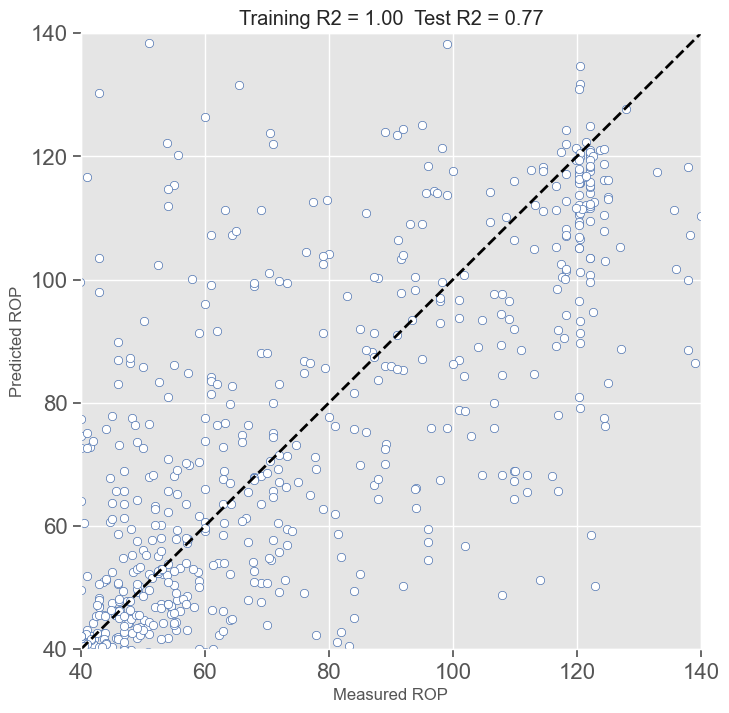

In [128]:
%%time
# Apply the best Hyperparameter to the Test Data
knn = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 12, p = 3, weights = 'distance', leaf_size = 10)
knn.fit(X_trainPCA, y_trainPCA) 
training_R2_knn = knn.score(X_trainPCA, y_trainPCA) # Compute training R2

y_pred_knn = knn.predict(X_validPCA)  # Make prediction using test NPHI, GR, RHOB
test_R2_knn = knn.score(X_validPCA, y_validPCA)       # Compute test R2

fig = plt.figure(figsize=(8, 8))
plt.axis([40, 140, 40, 140])
plt.scatter(y_validPCA, y_pred_knn, c = 'w', edgecolor = 'b')
plt.plot([40, 140],[40, 140], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted ROP') 
plt.xlabel('Measured ROP') 
plt.title('Training R2 = %.2f  Test R2 = %.2f' %(training_R2_knn, test_R2_knn))

### 6.2 Hyperparameters Tuning and Cross Validation for KNN Model (RandomizedSearchCV)

In [129]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Define the KNN regressor
knn = KNeighborsRegressor()

# Define the hyperparameters to search over
param_distributions_knn = {
    'n_neighbors': range(1,20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'leaf_size': list(range(10, 51, 10)),
    'p': [1, 2]}

# Use RandomizedSearchCV to find the best hyperparameters
random_search_knn = RandomizedSearchCV(knn, param_distributions_knn,
                                       n_iter=20, cv=10, n_jobs=-1, random_state=42,
                                       scoring='neg_mean_squared_error')

# Fit the model to the data
random_search_knn.fit(X_trainPCA, y_trainPCA)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search_knn.best_params_)

# Get all the hyperparameters and their values for the best estimator
random_search_knn.best_estimator_.get_params()

cv_res = pd.DataFrame(random_search_knn.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]


Best hyperparameters:  {'weights': 'distance', 'p': 2, 'n_neighbors': 12, 'leaf_size': 50, 'algorithm': 'kd_tree'}
Wall time: 17.5 s


params  split0_test_score  \
12  {'weights': 'distance', 'p': 2, 'n_neighbors':...        -964.861681   
5   {'weights': 'distance', 'p': 1, 'n_neighbors':...        -979.356076   
19  {'weights': 'distance', 'p': 1, 'n_neighbors':...       -1000.154639   
2   {'weights': 'distance', 'p': 1, 'n_neighbors':...        -995.843044   
16  {'weights': 'distance', 'p': 1, 'n_neighbors':...       -1001.730344   
4   {'weights': 'uniform', 'p': 1, 'n_neighbors': ...       -1066.061300   
0   {'weights': 'uniform', 'p': 1, 'n_neighbors': ...       -1066.061300   
9   {'weights': 'uniform', 'p': 1, 'n_neighbors': ...        -925.884365   
13  {'weights': 'uniform', 'p': 1, 'n_neighbors': ...        -925.884365   
14  {'weights': 'uniform', 'p': 2, 'n_neighbors': ...       -1052.808311   
3   {'weights': 'uniform', 'p': 1, 'n_neighbors': ...       -1084.845970   
7   {'weights': 'uniform', 'p': 1, 'n_neighbors': ...       -1089.148490   
6   {'weights': 'uniform', 'p': 2, 'n_neighbors': ...       -1063.017804   
11  {'weights': 'uniform', 'p': 2, 'n_neighbors': ...        -933.397608   
17  {'weights': 'uniform', 'p': 1, 'n_neighbors': ...       -1100.848059   
8   {'weights': 'uniform', 'p': 1, 'n_neighbors': ...       -1117.694571   
1   {'weights': 'uniform', 'p': 1, 'n_neighbors': ...       -1117.694571   
15  {'weights': 'distance', 'p': 2, 'n_neighbors':...        -985.252864   
18  {'weights': 'distance', 'p': 1, 'n_neighbors':...       -1002.285141   
10  {'weights': 'distance', 'p': 1, 'n_neighbors':...       -1002.285141   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
12       -1415.099623        -882.697517     -1205.469126      162.055144   
5        -1391.008126        -912.970910     -1224.563931      153.335101   
19       -1491.314319        -889.454399     -1230.347916      167.962260   
2        -1495.262982        -892.269208     -1237.388601      172.251722   
16       -1497.832538        -887.934979     -1240.243960      175.203089   
4        -1460.100949        -948.201550     -1269.675884      161.066177   
0        -1460.115062        -948.201550     -1269.892925      161.137721   
9        -1420.441922       -1009.504293     -1272.131621      174.980387   
13       -1420.441922       -1009.504293     -1272.131621      174.980387   
14       -1592.511005        -929.132015     -1289.693027      188.051897   
3        -1699.473455        -962.923722     -1328.561755      201.815598   
7        -1680.730117        -966.739645     -1331.336299      195.224547   
6        -1615.424156        -958.184012     -1334.516378      199.717806   
11       -1419.619650       -1135.460128     -1334.920107      190.318916   
17       -1707.242523        -958.638034     -1349.740008      207.801632   
8        -1703.037561        -981.001034     -1364.832656      203.380614   
1        -1703.037561        -981.001034     -1364.832656      203.380614   
15       -1772.669695       -1212.443903     -1450.834141      215.624544   
18       -1729.667864       -1287.930927     -1501.466064      218.970480   
10       -1729.667864       -1287.930927     -1501.466064      218.970480   

    rank_test_score  
12                1  
5                 2  
19                3  
2                 4  
16                5  
4                 6  
0                 7  
9                 8  
13                8  
14               10  
3                11  
7                12  
6                13  
11               14  
17               15  
8                16  
1                16  
15               18  
18               19  
10               19

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using KNN (RandomizedSearchCV) with an optimal set of parameters')

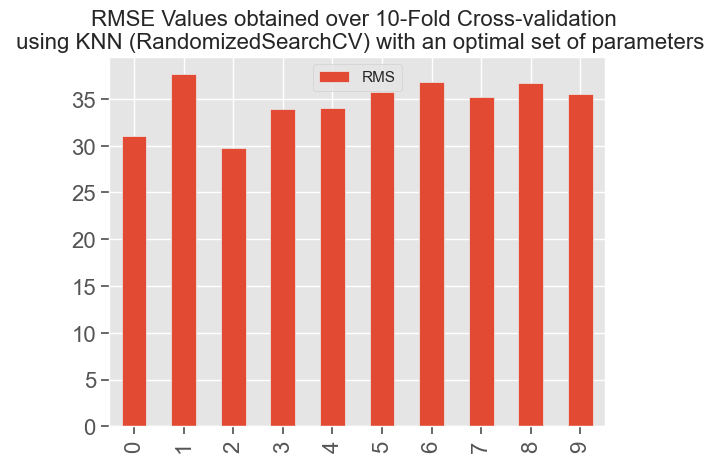

In [130]:
# Use the optimal hyperparameters for the KNN model and check model performance across all folds
knn = KNeighborsRegressor(weights = 'distance', p = 2, n_neighbors = 12, leaf_size = 50, algorithm = 'kd_tree')
rmse_knn_rs = -cross_val_score(knn, X_trainPCA, y_trainPCA, scoring="neg_root_mean_squared_error", cv=10)
df_rf_rmses_knn_rs = pd.DataFrame(rmse_knn_rs, columns = ['RMS'])
df_rf_rmses_knn_rs.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using KNN (RandomizedSearchCV) with an optimal set of parameters', fontsize = 16)

Wall time: 240 ms


Text(0.5, 1.0, 'Training R2 = 1.00  Test R2 = 0.77')

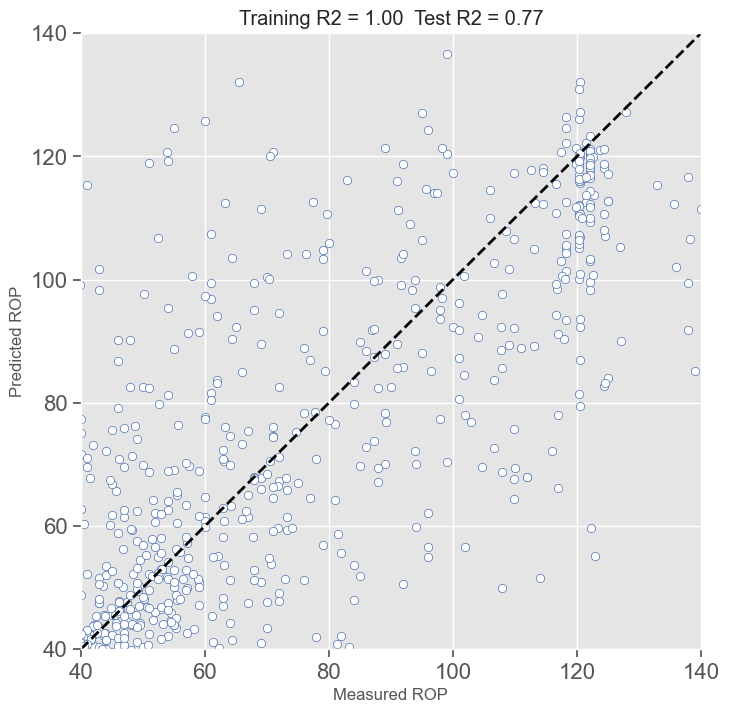

In [131]:
%%time
knn = KNeighborsRegressor(weights = 'distance', p = 2, n_neighbors = 12, leaf_size = 50, algorithm = 'kd_tree')
knn.fit(X_trainPCA, y_trainPCA) 
training_R2_knn_rs = knn.score(X_trainPCA, y_trainPCA) # Compute training R2

y_pred_knn_rs = knn.predict(X_validPCA)  # Make prediction using test NPHI, GR, RHOB
test_R2_knn_rs = knn.score(X_validPCA, y_validPCA)       # Compute test R2

fig = plt.figure(figsize=(8, 8))
plt.axis([40, 140, 40, 140])
plt.scatter(y_validPCA, y_pred_knn_rs, c = 'w', edgecolor = 'b')
plt.plot([40, 140],[40, 140], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted ROP') 
plt.xlabel('Measured ROP') 
plt.title('Training R2 = %.2f  Test R2 = %.2f' %(training_R2_knn_rs, test_R2_knn_rs))

### 6.3: Hyperparameters Tuning and Cross Validation for KNN Model (Genetic Algorithm)

In [137]:
%%time
from tpot import TPOTRegressor

parameters = {
    'n_neighbors': range(1,20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'leaf_size': list(range(10, 51, 10)),
    'p': [1, 2]}
   
               
ga2 = TPOTRegressor(generations= 10, population_size= 100, offspring_size= 10,
                                 verbosity= 10, early_stop= 10,
                                 config_dict=
                                 {'sklearn.neighbors.KNeighborsRegressor': parameters}, 
                                 cv = 10, scoring = 'neg_mean_squared_error')
ga2.fit(X_trainPCA, y_trainPCA)

1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Wall time: 9min 58s


TPOTRegressor(config_dict={'sklearn.neighbors.KNeighborsRegressor': {'algorithm': ['brute',
                                                                                   'kd_tree',
                                                                                   'ball_tree'],
                                                                     'leaf_size': [10,
                                                                                   20,
                                                                                   30,
                                                                                   40,
                                                                                   50],
                                                                     'n_neighbors': range(1, 20),
                                                                     'p': [1,
                                                                           2],
                          

In [118]:
# Print the best hyperparameters
print("Best hyperparameters: ", ga2.fitted_pipeline_.get_params()['kneighborsregressor'])


Best hyperparameters:  KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, n_neighbors=11, p=1)


Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using KNN (Genetic Algorithm) with an optimal set of parameters')

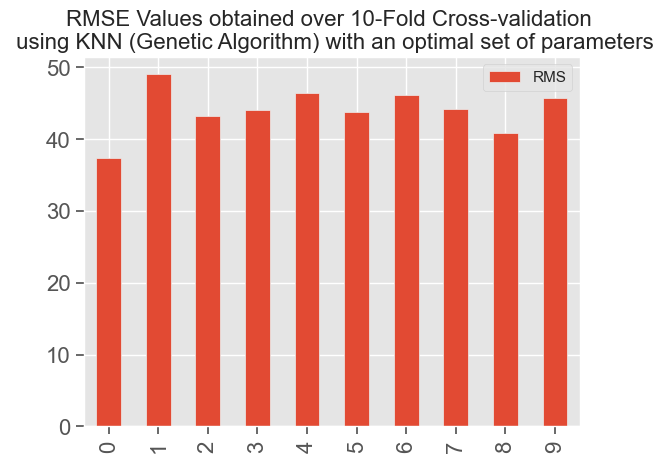

In [138]:
# Use the optimal hyperparameters for the SVM model and check model performance across all folds
knn = KNeighborsRegressor(algorithm='ball_tree', leaf_size=50, n_neighbors=1, p=1)
rmse_knn_ga = -cross_val_score(knn, X_trainPCA, y_trainPCA, scoring="neg_root_mean_squared_error", cv=10)
df_rf_rmses_knn_ga = pd.DataFrame(rmse_knn_ga, columns = ['RMS'])
df_rf_rmses_knn_ga.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using KNN (Genetic Algorithm) with an optimal set of parameters', fontsize = 16)

Wall time: 485 ms


Text(0.5, 1.0, 'Training R2 = 1.00  Test R2 = 0.69')

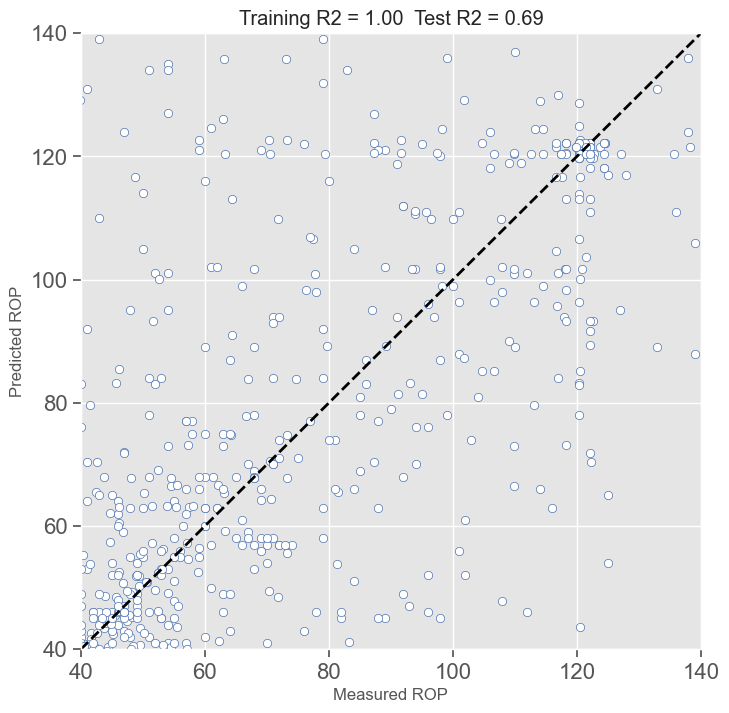

In [139]:
%%time
# Apply the best Hyperparameter to the Test Data
knn = KNeighborsRegressor(algorithm='ball_tree', leaf_size=50, n_neighbors=1, p=1)
knn.fit(X_trainPCA, y_trainPCA) 
training_R2_knn_ga = knn.score(X_trainPCA, y_trainPCA) # Compute training R2

y_pred_knn_ga = knn.predict(X_validPCA)  # Make prediction
test_R2_knn_ga = knn.score(X_validPCA, y_validPCA)       # Compute test R2

fig = plt.figure(figsize=(8, 8))
plt.axis([40, 140, 40, 140])
plt.scatter(y_validPCA, y_pred_knn_ga, c = 'w', edgecolor = 'b')
plt.plot([40, 140],[40, 140], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted ROP') 
plt.xlabel('Measured ROP') 
plt.title('Training R2 = %.2f  Test R2 = %.2f' %(training_R2_knn_ga, test_R2_knn_ga))

### 6.4: Hyperparameters Tuning and Cross Validation for KNN Model (Hyperband)

In [143]:
%%time
from hyperopt import fmin, tpe, hp, Trials
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the search space for hyperparameters
space = {
    'n_neighbors': hp.choice('n_neighbors', range(1, 20)),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    
    'p': hp.choice('p', [1, 2, 3])
}

# Define the objective function to minimize (in this case, the negative mean squared error)
def objective(params):
    knn = KNeighborsRegressor(**params)
    mse = -np.mean(cross_val_score(knn, X_trainPCA, y_trainPCA, cv=10, scoring='neg_mean_squared_error'))
    return mse

# Run the hyperparameter optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Print the best hyperparameters found
print("Best hyperparameters:", best)



100%|██████████████████████████████████████████████| 100/100 [00:50<00:00,  1.98trial/s, best loss: 1200.8423178285348]
Best hyperparameters: {'n_neighbors': 8, 'p': 2, 'weights': 1}
Wall time: 50.6 s


Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using KNN (Hyperband) with an optimal set of parameters')

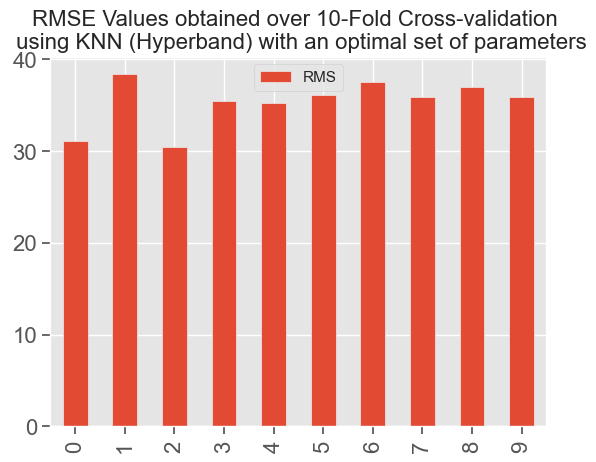

In [144]:
# Use the optimal hyperparameters for the SVM model and check model performance across all folds
knn = KNeighborsRegressor(n_neighbors=8, p=2, weights='uniform')
rmse_knn_bo = -cross_val_score(knn, X_trainPCA, y_trainPCA, scoring="neg_root_mean_squared_error", cv=10)
df_rf_rmses_knn_bo = pd.DataFrame(rmse_knn_bo, columns = ['RMS'])
df_rf_rmses_knn_bo.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using KNN (Hyperband) with an optimal set of parameters', fontsize = 16)

Wall time: 155 ms


Text(0.5, 1.0, 'Training R2 = 0.83  Test R2 = 0.76')

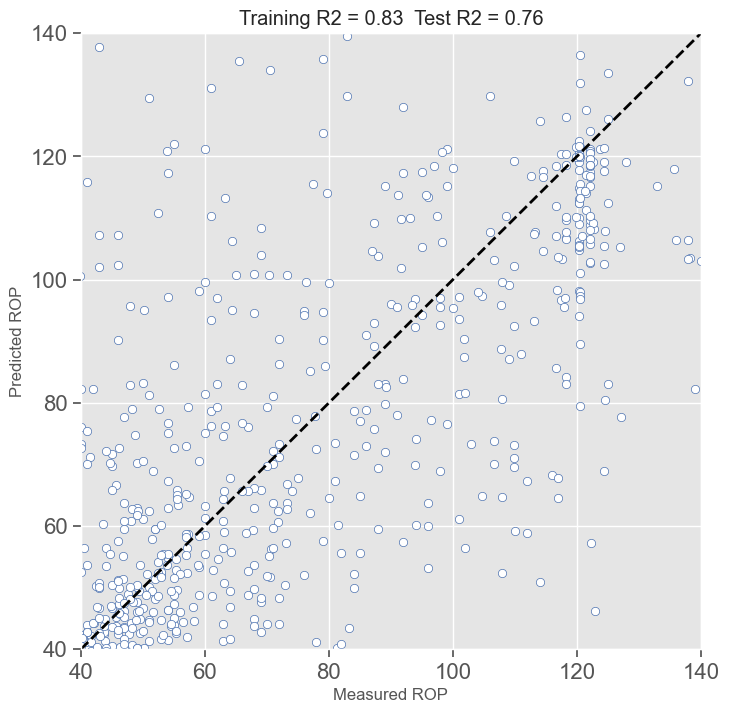

In [145]:
%%time
# Apply the best Hyperparameter to the Test Data
knn = KNeighborsRegressor(n_neighbors=8, p=2, weights='uniform')
knn.fit(X_trainPCA, y_trainPCA) 
training_R2_knn_bo = knn.score(X_trainPCA, y_trainPCA) # Compute training R2

y_pred_knn_bo = knn.predict(X_validPCA)  # Make prediction
test_R2_knn_bo = knn.score(X_validPCA, y_validPCA)       # Compute test R2

fig = plt.figure(figsize=(8, 8))
plt.axis([40, 140, 40, 140])
plt.scatter(y_validPCA, y_pred_knn_bo, c = 'w', edgecolor = 'b')
plt.plot([40, 140],[40, 140], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted ROP') 
plt.xlabel('Measured ROP') 
plt.title('Training R2 = %.2f  Test R2 = %.2f' %(training_R2_knn_bo, test_R2_knn_bo))

# 7. Evaluation

## 7.1: Comparison of Optimization Algorithm Computation Time.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'GridSearchCV'),
  Text(1, 0, 'RandomizedSearchCV'),
  Text(2, 0, 'Genetic_Algorithm'),
  Text(3, 0, 'Hyperband')])

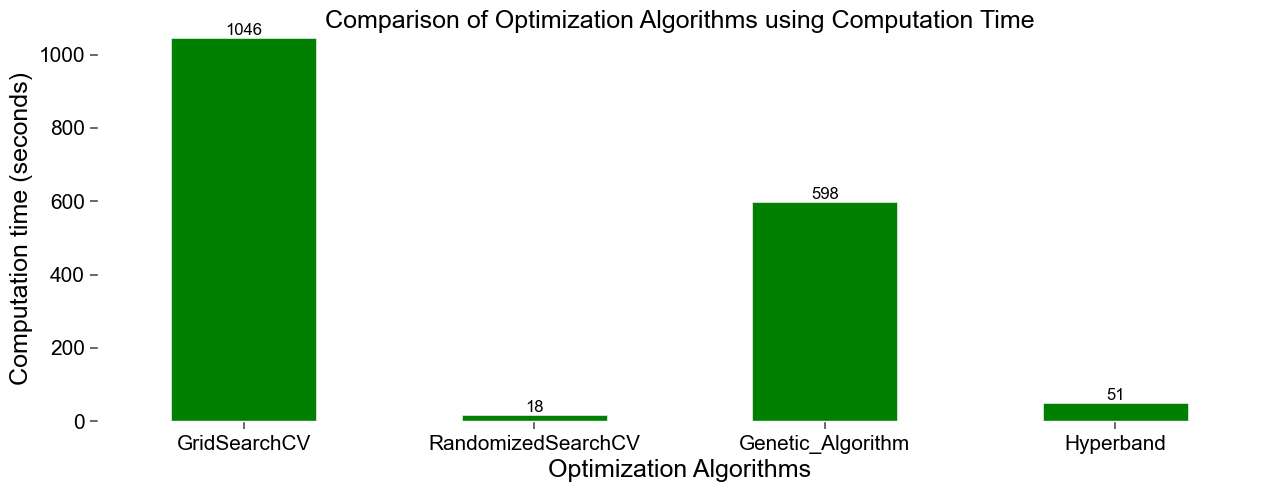

In [146]:
index = ['GridSearchCV', 'RandomizedSearchCV', 'Genetic_Algorithm', 'Hyperband']
Computation_time = [1046, 18, 598, 51]


score_df = pd.DataFrame({'Computation_time': Computation_time}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['green'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, Computation_time)

plt.xlabel('Optimization Algorithms', fontsize = 18, color= 'black')
plt.ylabel('Computation time (seconds)', fontsize = 18, color= 'black')
plt.title('Comparison of Optimization Algorithms using Computation Time', fontsize = 18, color= 'black')
plt.ylim([0, 1050])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

## 7.2: Comparison of Optimization Algorithm using R2 Score.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'GridSearchCV'),
  Text(1, 0, 'RandomizedSearchCV'),
  Text(2, 0, 'Genetic_Algorithm'),
  Text(3, 0, 'Hyperband')])

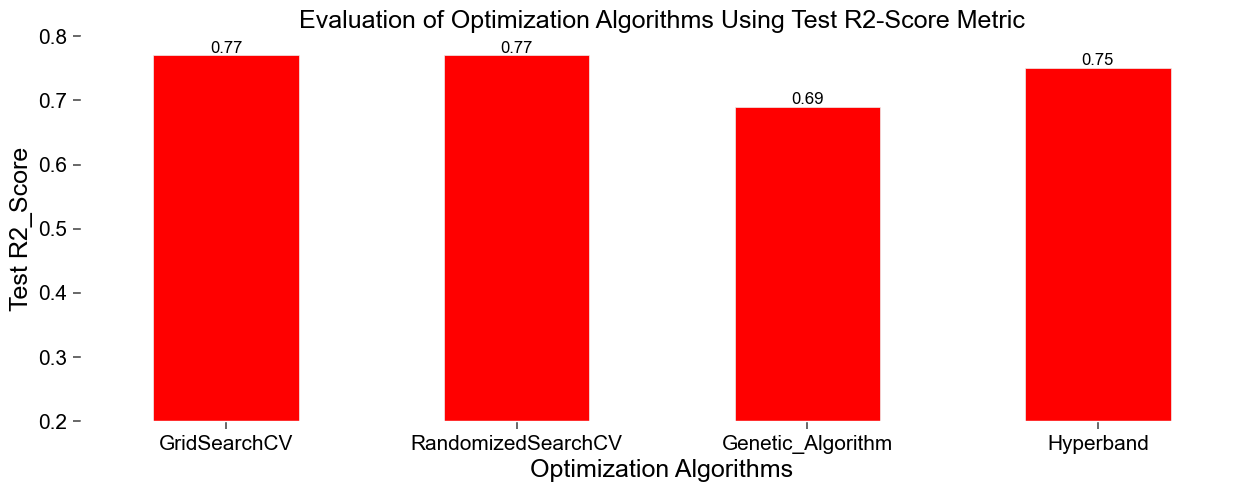

In [125]:
index = ['GridSearchCV', 'RandomizedSearchCV', 'Genetic_Algorithm', 'Hyperband']
Test_R2_Score = [0.77, 0.77, 0.69, 0.75]


score_df = pd.DataFrame({'Test_R2_Score': Test_R2_Score}, index=index)
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['red'], figsize=(15, 5))
ax.set_facecolor('white')
ax.get_legend().remove()
data_point(index, Test_R2_Score)

plt.xlabel('Optimization Algorithms', fontsize = 18, color= 'black')
plt.ylabel('Test R2_Score', fontsize = 18, color= 'black')
plt.title('Evaluation of Optimization Algorithms Using Test R2-Score Metric', fontsize = 18, color= 'black')
plt.ylim([0.2, 0.80])
plt.yticks(fontsize=15, color = 'black')
plt.xticks(fontsize=15, color='black')

**Comment**

Several Machine Learning Methodologies were explored to optimized an ROP model. The following presents inferences and conclusions drawn from analysis.

* OneHot Encoding, Mean Encoding and Frequency Encoding used to transform categorical variables yielded similar performance on baseline mode, thus suggesting either techniques can be employed to yield closely related result.
* The feature extraction tecnique's ability to retain more information (i.e. Torque) and resolve the multicollinearity problem resulted to its selection for further analysis.
* Several machine learning well employed and KNN was chosen comparing the tradeoff between accuracy and overfitting.
* Several Optimization algorithm were employed to improve the ROP model based on regression metrics and computation time. Considering the tradeoff between computation time and accuracy Hyperband yield the best result

**Comment**

Based on Computer specifications and performance, computational time of the different optimization algorithm could be impacted.